# Exploratory data analysis - wildfires data - for real time pipeline

##  Data preprocessing

In [33]:
## Import libraries
from dotenv import load_dotenv
import os
import psycopg2
import pandas as pd
import urllib.request
import json
pd.set_option('display.max_columns', 500)

In [34]:
### Environment variable
load_dotenv('.env')
ENDPOINT_FETCH = os.getenv('ENDPOINT_FETCH')
DB_NAME_FETCH = os.getenv('DB_NAME_FETCH')
USERNAME_FETCH = os.getenv('USERNAME_FETCH')
PASSWORD_FETCH = os.getenv('PASSWORD_FETCH')
ENDPOINT = os.getenv('ENDPOINT')
DB_NAME = os.getenv('DB_NAME')
USER = os.getenv('USER')
PASSWORD = os.getenv('PASSWORD')
#print(USER)

In [35]:
## Extract tables from AWS RDS and turn into a dataframe
## create engine - connect to Historiacl wildfire data - Maran db
engine = psycopg2.connect("host={} dbname={} user={} password={}".format(
        ENDPOINT_FETCH, DB_NAME_FETCH, USERNAME_FETCH, PASSWORD_FETCH))
cur = engine.cursor()

## Extract table into a dataframe
#cur.execute("SELECT * FROM Firedata_History;")
df_wildfires = pd.read_sql("SELECT * FROM Firedata_History;", engine)
engine.close()

## create engine - connect to Historiacl weather data - Nathan db
## extract data from historical whether data table
engine = psycopg2.connect("host={} dbname={} user={} password={}".format(
        ENDPOINT, DB_NAME, USER, PASSWORD))
cur = engine.cursor()

## Extract table into a dataframe
#cur.execute("SELECT * FROM Firedata_History;")
df_weather = pd.read_sql("SELECT * FROM HISTORICAL_WEATHER_DATA;", engine)
engine.close()

c:\Users\eitam\VScodeProjects\datalake\venv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\eitam\VScodeProjects\datalake\venv\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [36]:
df_wildfires.head()

,objectid,containmentdatetime,controldatetime,dailyacres,discoveryacres,firecause,firecausegeneral,firecausespecific,firediscoverydatetime,firemgmtcomplexity,fireoutdatetime,incidentname,incidenttypecategory,incidenttypekind,initiallatitude,initiallongitude,initialresponseacres,poocity,poocounty,poolandownerkind,poostate,dateofupload
0,139,2016-05-05,2016-05-05,0.1,0.1,Natural,None,None,2016-05-05,None,2016-05-31,Monroe,WF,FI,38.767220,-119.8167,0.1,None,Alpine,None,US-CA,2022-04-21
1,287,2015-07-05,2015-07-10,0.2,0.1,Natural,None,None,2015-07-05,None,2015-07-11,SPRING,WF,FI,41.421398,-122.4981,NaN,None,Siskiyou,Federal,US-CA,2022-04-21
2,510,2019-08-11,2019-08-11,0.1,0.1,Natural,None,None,2019-08-10,None,2019-08-12,HAPPY,WF,FI,41.046330,-122.0796,NaN,None,Shasta,Federal,US-CA,2022-04-21
3,716,2017-08-07,2017-08-20,0.1,0.1,Natural,None,None,2017-08-07,None,2017-08-20,COAL,WF,FI,41.357780,-120.9694,0.1,None,Modoc,Federal,US-CA,2022-04-21
4,901,2017-08-06,2017-08-07,0.1,0.1,Natural,None,None,2017-08-06,None,2017-09-20,GEM,WF,FI,37.751220,-119.1410,0.1,None,Mono,Federal,US-CA,2022-04-21


In [37]:
df_wildfires.describe()

,objectid,dailyacres,discoveryacres,initiallatitude,initiallongitude,initialresponseacres
count,1464.000000,1440.000000,1464.000000,1464.000000,1464.000000,736.000000
mean,97564.855191,561.812011,8.989781,39.820497,-120.990017,22.819688
std,56394.764135,5795.891269,318.070480,1.940786,1.816608,264.374249
min,139.000000,0.100000,0.100000,32.494400,-134.550003,0.100000
25%,50084.000000,0.100000,0.100000,38.664271,-122.744750,0.100000
50%,97028.500000,0.100000,0.100000,40.222849,-120.852950,0.100000
75%,144829.250000,0.552500,0.100000,41.389205,-119.888250,0.500000
max,225869.000000,151623.000000,12166.000000,42.013330,-114.168701,4500.000000


In [38]:
df_weather.head()

,id,address,name,latitude,longitude,tz,wdir,temp,maxt,visibility,wspd,datetimestr,solarenergy,heatindex,cloudcover,mint,precip,solarradiation,weathertype,snowdepth,sealevelpressure,snow,dew,humidity,precipcover,wgust,conditions,windchill
0,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,176.79,9.4,17.6,15.9,11.9,2016-05-03,NaN,NaN,30.0,0.3,0.00,NaN,Light Rain,62.42,1018.6,0.00,2.0,64.00,0.00,37.1,Partially cloudy,-0.7
1,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,176.08,10.4,17.7,16.0,18.3,2016-05-04,NaN,NaN,23.6,3.4,0.24,NaN,"Lightning Without Thunder, Light Rain",59.08,1013.0,5.87,2.5,62.93,8.33,56.9,Snow,2.7
2,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,148.46,7.2,11.5,14.3,15.7,2016-05-05,NaN,NaN,63.4,2.9,12.80,NaN,"Lightning Without Thunder, Mist, Light Snow, T...",58.15,1009.3,3.78,4.0,80.99,54.17,37.1,"Snow, Partially cloudy",1.9
3,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,220.33,6.6,12.9,13.8,12.2,2016-05-06,NaN,NaN,68.7,2.0,9.14,NaN,"Mist, Light Snow, Rain, Thunderstorm, Light Rain",55.52,1009.5,0.00,2.7,78.93,58.33,31.7,"Rain, Partially cloudy",0.2
4,"38.76722,-119.8167","38.76722,-119.8167","38.76722,-119.8167",38.76722,-119.8167,America/Los_Angeles,181.25,7.0,9.4,14.8,10.7,2016-05-07,NaN,NaN,81.0,4.9,4.33,NaN,"Mist, Light Rain",63.04,1011.5,10.78,5.1,87.57,45.83,NaN,"Snow, Overcast",4.0


In [39]:
## extracting only wanted columns from wildfires df
df1 = df_wildfires[
    [
        "objectid",
        "firediscoverydatetime",
        "dailyacres",
        "initiallatitude",
        "initiallongitude",
    ]
]
## extracting only wanted columns from wheather df
df2 = df_weather[
    [
        "latitude",
        "longitude",
        "temp",
        "maxt",
        "datetimestr",
        "precip",
        "dew",
        "humidity",
        "wgust",
        "wdir",
        "wspd",
        "sealevelpressure"

    ]
]


In [40]:
print(df1.shape)
print(df2.shape)


(1464, 5)
(965, 12)


In [41]:
print(df1.head())
print(df2.head())

   objectid firediscoverydatetime  dailyacres  initiallatitude  \
0       139            2016-05-05         0.1        38.767220   
1       287            2015-07-05         0.2        41.421398   
2       510            2019-08-10         0.1        41.046330   
3       716            2017-08-07         0.1        41.357780   
4       901            2017-08-06         0.1        37.751220   

   initiallongitude  
0         -119.8167  
1         -122.4981  
2         -122.0796  
3         -120.9694  
4         -119.1410  
   latitude  longitude  temp  maxt datetimestr  precip  dew  humidity  wgust  \
0  38.76722  -119.8167   9.4  17.6  2016-05-03    0.00  2.0     64.00   37.1   
1  38.76722  -119.8167  10.4  17.7  2016-05-04    0.24  2.5     62.93   56.9   
2  38.76722  -119.8167   7.2  11.5  2016-05-05   12.80  4.0     80.99   37.1   
3  38.76722  -119.8167   6.6  12.9  2016-05-06    9.14  2.7     78.93   31.7   
4  38.76722  -119.8167   7.0   9.4  2016-05-07    4.33  5.1     87.57  

In [42]:
df1.columns = ["objectid", "datetimestr", "dailyacres", "latitude", "longitude"]

In [43]:
df_merge = pd.merge(df1, df2, on=["datetimestr", "latitude", "longitude"], how='inner')
df_merge = pd.merge(df1, df2, on=["datetimestr", "latitude", "longitude"], how='right')

df_merge.head()

,objectid,datetimestr,dailyacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure
0,NaN,2016-05-03,NaN,38.76722,-119.8167,9.4,17.6,0.00,2.0,64.00,37.1,176.79,11.9,1018.6
1,NaN,2016-05-04,NaN,38.76722,-119.8167,10.4,17.7,0.24,2.5,62.93,56.9,176.08,18.3,1013.0
2,139.0,2016-05-05,0.1,38.76722,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3
3,NaN,2016-05-06,NaN,38.76722,-119.8167,6.6,12.9,9.14,2.7,78.93,31.7,220.33,12.2,1009.5
4,NaN,2016-05-07,NaN,38.76722,-119.8167,7.0,9.4,4.33,5.1,87.57,NaN,181.25,10.7,1011.5


In [44]:
#df_merge["temp_plus_1"] =
df_merge["tmp_plus_1"] = df_merge["temp"].shift(-1)
df_merge["tmp_plus_2"] = df_merge["temp"].shift(-2)

df_merge["maxt_plus_1"] = df_merge["maxt"].shift(-1)
df_merge["maxt_plus_2"] = df_merge["maxt"].shift(-2)

df_merge["precip_plus_1"] = df_merge["precip"].shift(-1)
df_merge["precip_plus_2"] = df_merge["precip"].shift(-2)

df_merge["dew_plus_1"] = df_merge["dew"].shift(-1)
df_merge["dew_plus_2"] = df_merge["dew"].shift(-2)

df_merge["humidity_plus_1"] = df_merge["humidity"].shift(-1)
df_merge["humidity_plus_2"] = df_merge["humidity"].shift(-2)

df_merge["wgust_plus_1"] = df_merge["wgust"].shift(-1)
df_merge["wgust_plus_2"] = df_merge["wgust"].shift(-2)

df_merge["wdir_plus_1"] = df_merge["wdir"].shift(-1)
df_merge["wdir_plus_2"] = df_merge["wdir"].shift(-2)

df_merge["wspd_plus_1"] = df_merge["wspd"].shift(-1)
df_merge["wspd_plus_2"] = df_merge["wspd"].shift(-2)

df_merge.head()

,objectid,datetimestr,dailyacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2
0,NaN,2016-05-03,NaN,38.76722,-119.8167,9.4,17.6,0.00,2.0,64.00,37.1,176.79,11.9,1018.6,10.4,7.2,17.7,11.5,0.24,12.80,2.5,4.0,62.93,80.99,56.9,37.1,176.08,148.46,18.3,15.7
1,NaN,2016-05-04,NaN,38.76722,-119.8167,10.4,17.7,0.24,2.5,62.93,56.9,176.08,18.3,1013.0,7.2,6.6,11.5,12.9,12.80,9.14,4.0,2.7,80.99,78.93,37.1,31.7,148.46,220.33,15.7,12.2
2,139.0,2016-05-05,0.1,38.76722,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7
3,NaN,2016-05-06,NaN,38.76722,-119.8167,6.6,12.9,9.14,2.7,78.93,31.7,220.33,12.2,1009.5,7.0,23.4,9.4,28.2,4.33,0.00,5.1,12.7,87.57,51.78,NaN,NaN,181.25,117.50,10.7,5.6
4,NaN,2016-05-07,NaN,38.76722,-119.8167,7.0,9.4,4.33,5.1,87.57,NaN,181.25,10.7,1011.5,23.4,24.3,28.2,34.7,0.00,0.08,12.7,13.3,51.78,53.99,NaN,NaN,117.50,124.58,5.6,15.6


In [45]:
df = df_merge[df_merge.objectid.notnull()].copy()
df.head()

,objectid,datetimestr,dailyacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2
2,139.0,2016-05-05,0.1,38.767220,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7
7,287.0,2015-07-05,0.2,41.421398,-122.4981,24.3,32.4,0.00,12.8,51.91,37.1,200.96,20.6,1013.8,23.8,22.5,32.3,32.2,0.00,0.40,10.6,11.2,47.41,51.47,31.7,48.2,173.63,78.42,10.3,9.2
12,510.0,2019-08-10,0.1,41.046330,-122.0796,15.6,21.1,8.84,10.8,74.54,48.8,231.54,11.4,1015.7,17.8,21.6,26.2,30.7,0.00,0.00,8.6,8.5,59.17,47.89,NaN,NaN,163.50,196.17,9.1,10.7
17,716.0,2017-08-07,0.1,41.357780,-120.9694,19.3,29.4,2.80,11.2,65.42,41.5,147.37,24.1,1016.1,20.8,22.1,30.7,29.4,0.30,0.30,10.1,10.7,59.59,53.04,NaN,29.5,107.14,129.09,20.5,22.3
22,901.0,2017-08-06,0.1,37.751220,-119.1410,16.9,25.0,0.00,6.9,56.95,32.8,177.38,27.4,1014.3,17.8,18.7,26.1,26.7,0.00,0.62,4.9,4.9,46.59,44.27,51.8,42.5,204.38,190.42,31.3,26.5


In [46]:
## setting month as a new feature
df["month"] = df["datetimestr"].apply(lambda x: x.month)
df.head()

,objectid,datetimestr,dailyacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2,month
2,139.0,2016-05-05,0.1,38.767220,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7,5
7,287.0,2015-07-05,0.2,41.421398,-122.4981,24.3,32.4,0.00,12.8,51.91,37.1,200.96,20.6,1013.8,23.8,22.5,32.3,32.2,0.00,0.40,10.6,11.2,47.41,51.47,31.7,48.2,173.63,78.42,10.3,9.2,7
12,510.0,2019-08-10,0.1,41.046330,-122.0796,15.6,21.1,8.84,10.8,74.54,48.8,231.54,11.4,1015.7,17.8,21.6,26.2,30.7,0.00,0.00,8.6,8.5,59.17,47.89,NaN,NaN,163.50,196.17,9.1,10.7,8
17,716.0,2017-08-07,0.1,41.357780,-120.9694,19.3,29.4,2.80,11.2,65.42,41.5,147.37,24.1,1016.1,20.8,22.1,30.7,29.4,0.30,0.30,10.1,10.7,59.59,53.04,NaN,29.5,107.14,129.09,20.5,22.3,8
22,901.0,2017-08-06,0.1,37.751220,-119.1410,16.9,25.0,0.00,6.9,56.95,32.8,177.38,27.4,1014.3,17.8,18.7,26.1,26.7,0.00,0.62,4.9,4.9,46.59,44.27,51.8,42.5,204.38,190.42,31.3,26.5,8


## Exploring the data

In [47]:
# statment = df["dailyacres"]!=df["dailyacres"].max()
# statment
# df = df[statment]

c:\Users\eitam\VScodeProjects\datalake\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


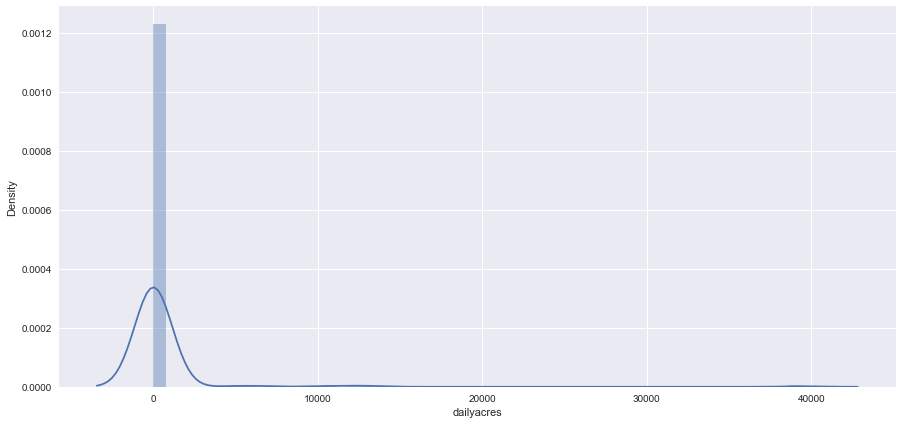

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig, ax = plt.subplots(1,1, figsize=(15,7)) 
sns.distplot(df.dailyacres)
#ax.set_yscale('log')
#ax.set_ylabel('log count')
#ax.set_xticks(np.arange(0, 12, 0.5))

plt.show()


In [49]:
## Create target column -divide size of fire into bins
bins = [0, 0.2, 0.6, 1.1, np.inf]
names = ['<0.2', '0.2-0.6', '0.6-1.1', '1.1<']

df['FireSize'] = pd.cut(df['dailyacres'], bins, labels=names)
df.head()

,objectid,datetimestr,dailyacres,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,sealevelpressure,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2,month,FireSize
2,139.0,2016-05-05,0.1,38.767220,-119.8167,7.2,11.5,12.80,4.0,80.99,37.1,148.46,15.7,1009.3,6.6,7.0,12.9,9.4,9.14,4.33,2.7,5.1,78.93,87.57,31.7,NaN,220.33,181.25,12.2,10.7,5,<0.2
7,287.0,2015-07-05,0.2,41.421398,-122.4981,24.3,32.4,0.00,12.8,51.91,37.1,200.96,20.6,1013.8,23.8,22.5,32.3,32.2,0.00,0.40,10.6,11.2,47.41,51.47,31.7,48.2,173.63,78.42,10.3,9.2,7,<0.2
12,510.0,2019-08-10,0.1,41.046330,-122.0796,15.6,21.1,8.84,10.8,74.54,48.8,231.54,11.4,1015.7,17.8,21.6,26.2,30.7,0.00,0.00,8.6,8.5,59.17,47.89,NaN,NaN,163.50,196.17,9.1,10.7,8,<0.2
17,716.0,2017-08-07,0.1,41.357780,-120.9694,19.3,29.4,2.80,11.2,65.42,41.5,147.37,24.1,1016.1,20.8,22.1,30.7,29.4,0.30,0.30,10.1,10.7,59.59,53.04,NaN,29.5,107.14,129.09,20.5,22.3,8,<0.2
22,901.0,2017-08-06,0.1,37.751220,-119.1410,16.9,25.0,0.00,6.9,56.95,32.8,177.38,27.4,1014.3,17.8,18.7,26.1,26.7,0.00,0.62,4.9,4.9,46.59,44.27,51.8,42.5,204.38,190.42,31.3,26.5,8,<0.2


     index  FireSize  order
0     <0.2       127      0
2  0.2-0.6        22      1
3  0.6-1.1        11      2
1     1.1<        29      3


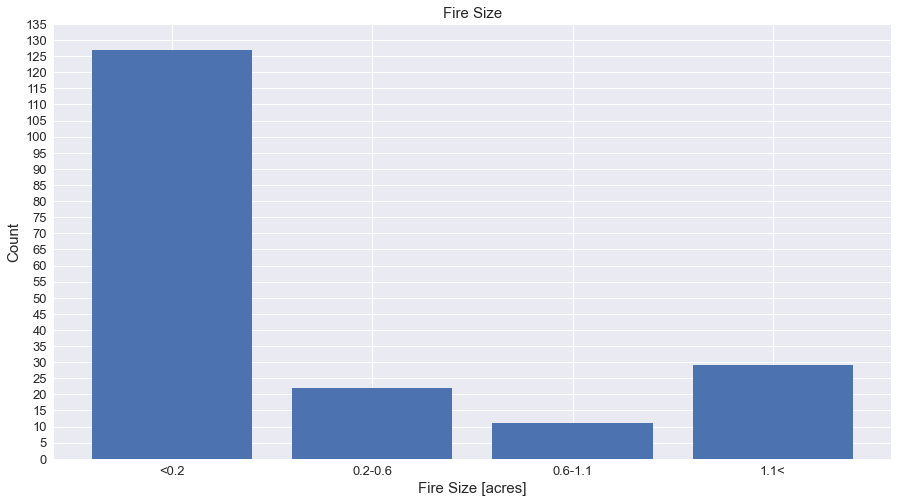

In [50]:
a1 = df["FireSize"].value_counts().reset_index()
a1["order"] = [0,3,1,2]
a1.sort_values(by=["order"], inplace=True)
print(a1)
fig, ax = plt.subplots(1,1, figsize = (15,8))
ax.bar(a1["index"], a1["FireSize"])
ax.set_xticks([0,1,2,3])
ax.set_yticks(np.arange(0,140,5))

ax.set_xlabel("Fire Size [acres]", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Fire Size", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.savefig("FireSize.svg")
plt.show()


Text(0.5, 20.800000000000004, 'dailyacres')

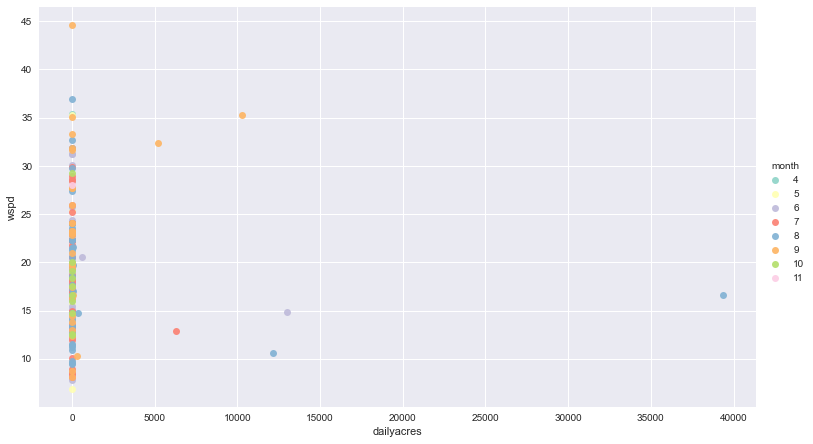

In [51]:
sns.lmplot(data=df,x="dailyacres", y="wspd" , hue="month",
            scatter_kws={'alpha':0.9}, palette="Set3",height=6.27, aspect=10.7/6.27, fit_reg=False, x_jitter=0.1)
plt.xlabel("dailyacres")

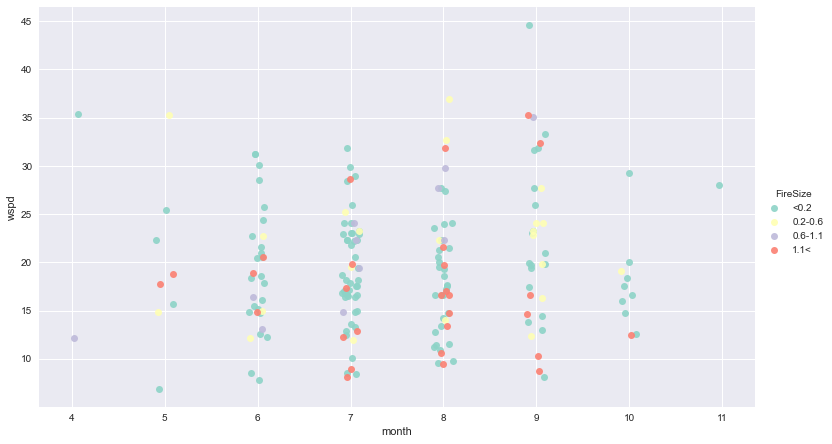

In [52]:
sns.lmplot(data=df,x="month", y="wspd" , hue="FireSize",
            scatter_kws={'alpha':0.9}, palette="Set3",height=6.27, aspect=10.7/6.27, fit_reg=False, x_jitter=0.1)
plt.xlabel("month")
plt.savefig("Speed_month.svg")

plt.show()

In [53]:
## Split data
df = df[pd.notnull(df["FireSize"])]
from sklearn.model_selection import train_test_split
train, val = train_test_split(df,test_size=0.20,random_state=0,
                                                    stratify=df["FireSize"])

Number of columns with missing data: 4


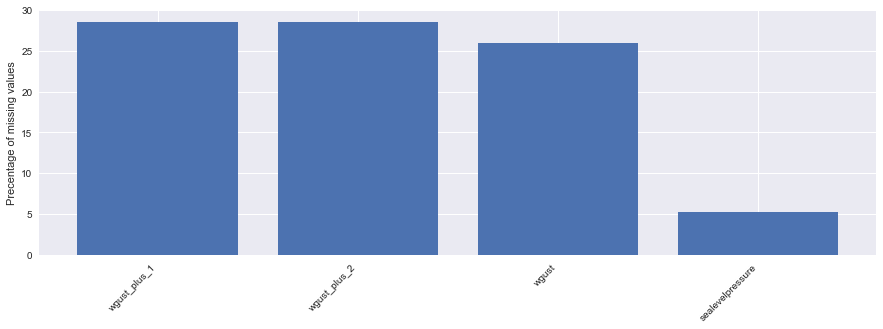

In [54]:
def missing_values(df):
    ## Missing values
    null_df = df.isnull().sum() * 100 / len(df)
    null_df.sort_values(ascending=False, inplace=True)
    null_df = null_df[null_df.values != 0]  # Removing columns without missing values
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.style.use("seaborn")
    ax.bar(null_df.index, null_df.values)
    fig.autofmt_xdate(rotation=45)
    ax.set_ylabel("Precentage of missing values")
    print("Number of columns with missing data: {}".format(null_df.size))
    plt.show()


missing_values(df)


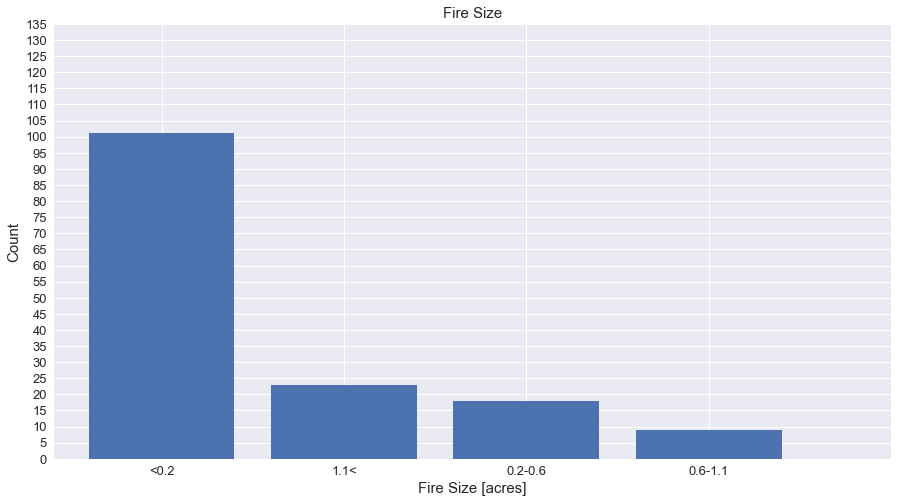

In [55]:
a1 = train["FireSize"].value_counts()

fig, ax = plt.subplots(1,1, figsize = (15,8))
ax.bar(a1.index, a1.values)
ax.set_xticks([0,1,2,3,4])
ax.set_yticks(np.arange(0,140,5))

ax.set_xlabel("Fire Size [acres]", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Fire Size", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)

In [56]:
train.columns

Index(['objectid', 'datetimestr', 'dailyacres', 'latitude', 'longitude',
       'temp', 'maxt', 'precip', 'dew', 'humidity', 'wgust', 'wdir', 'wspd',
       'sealevelpressure', 'tmp_plus_1', 'tmp_plus_2', 'maxt_plus_1',
       'maxt_plus_2', 'precip_plus_1', 'precip_plus_2', 'dew_plus_1',
       'dew_plus_2', 'humidity_plus_1', 'humidity_plus_2', 'wgust_plus_1',
       'wgust_plus_2', 'wdir_plus_1', 'wdir_plus_2', 'wspd_plus_1',
       'wspd_plus_2', 'month', 'FireSize'],
      dtype='object')

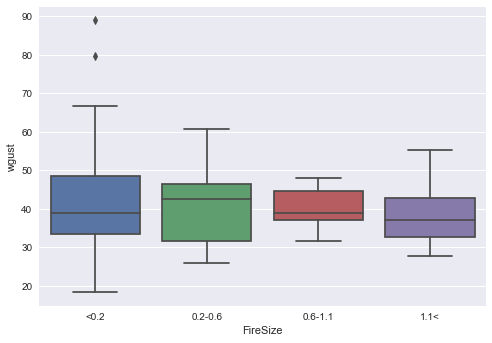

In [57]:
sns.boxplot(data=train, x="FireSize", y="wgust")
plt.show()

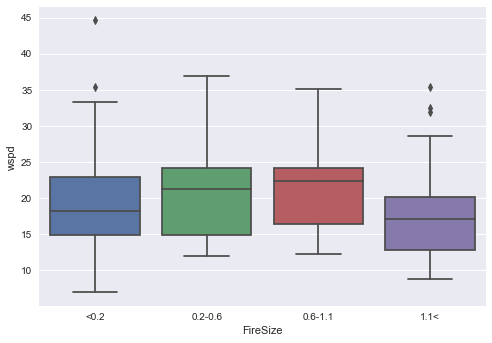

In [58]:
sns.boxplot(data=train, x="FireSize", y="wspd")
plt.show()

## Correlation plots by target column

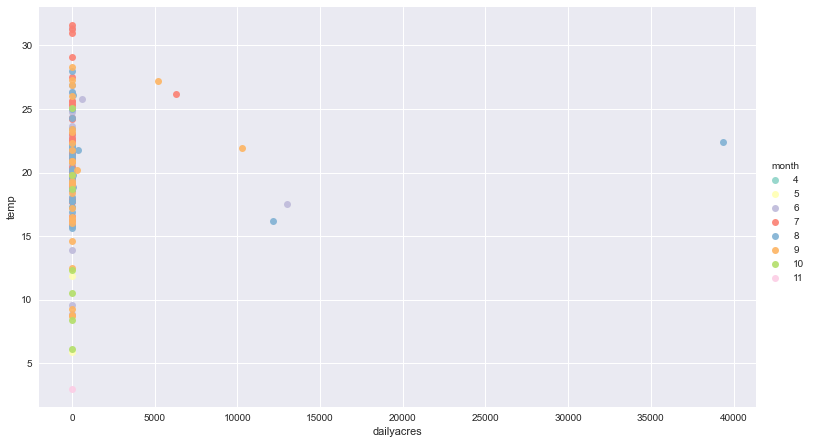

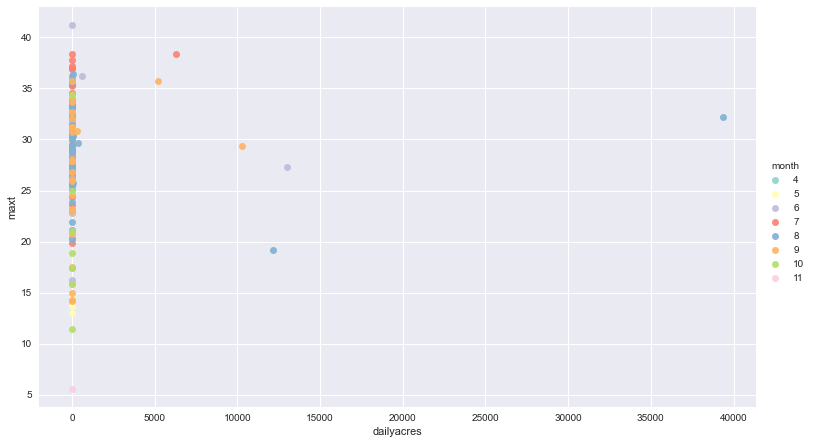

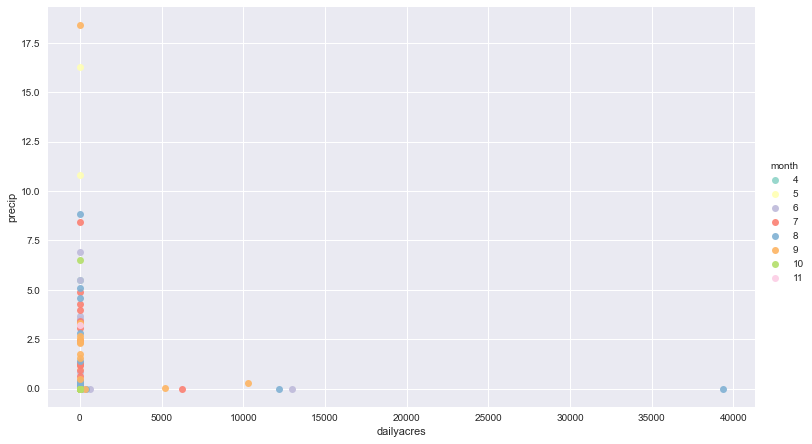

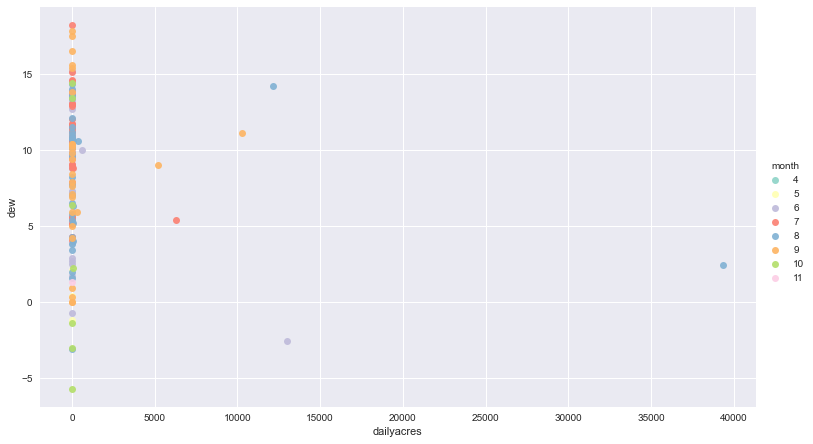

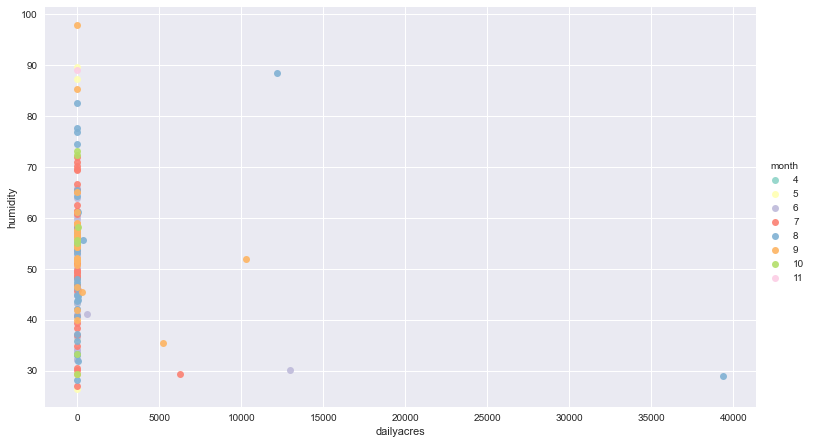

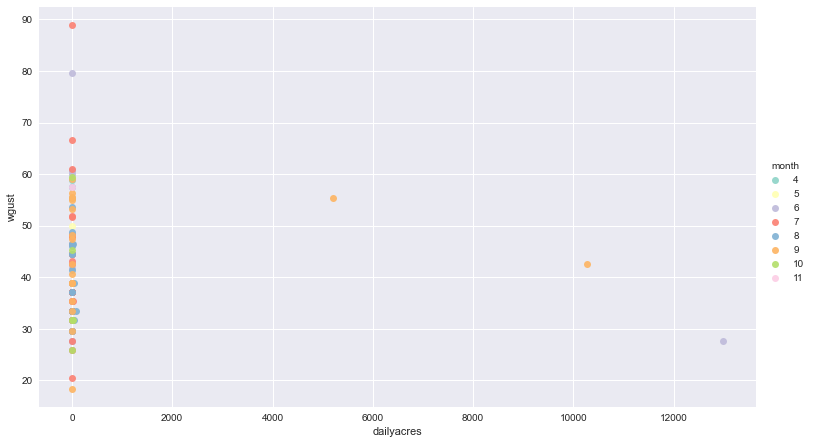

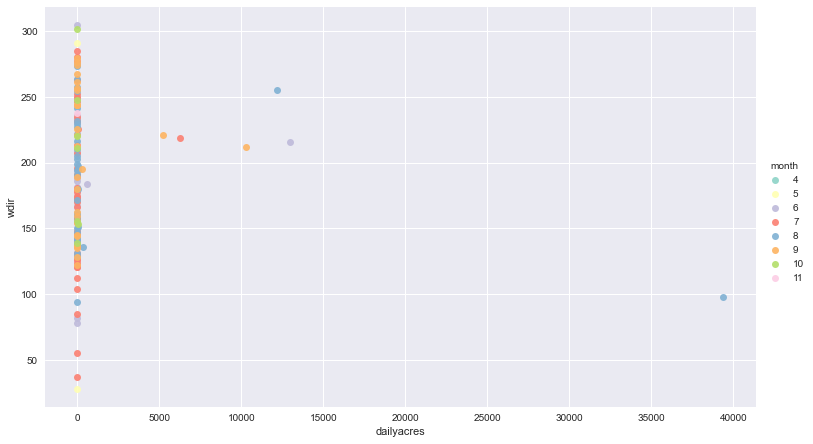

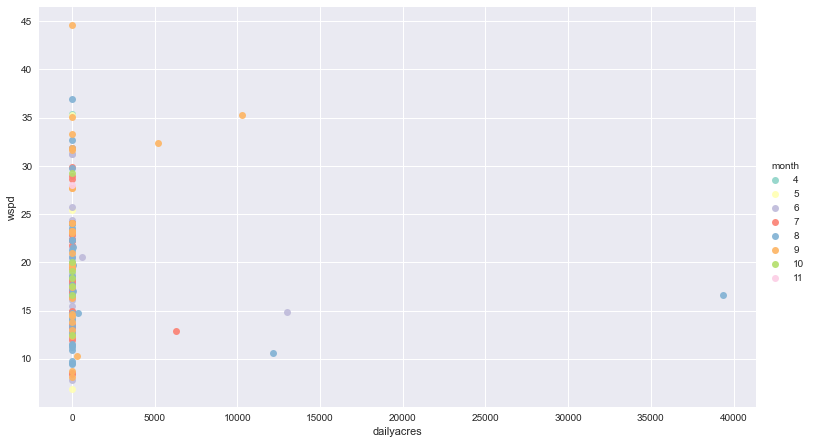

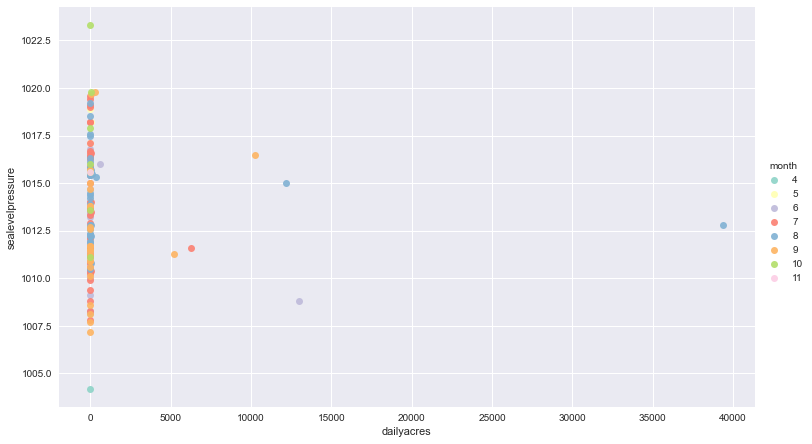

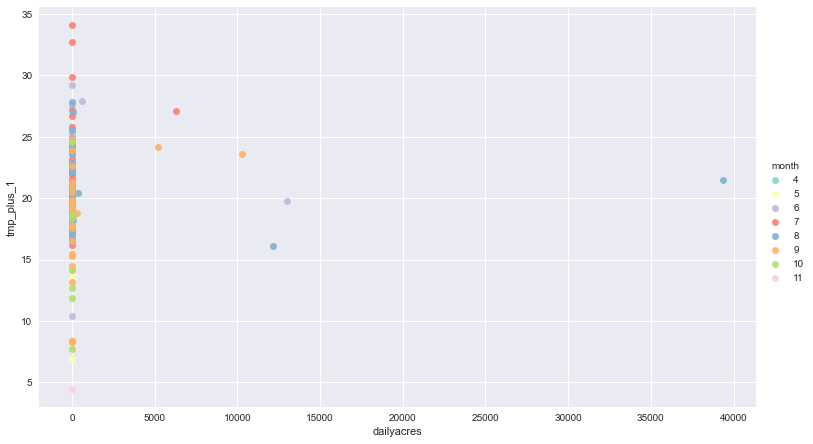

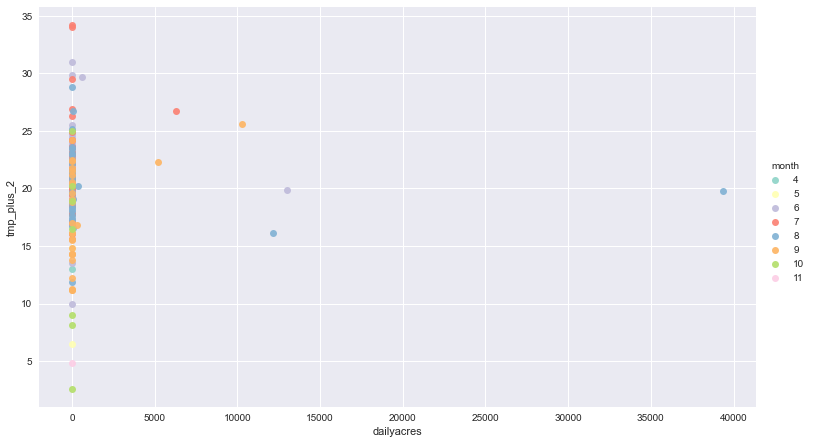

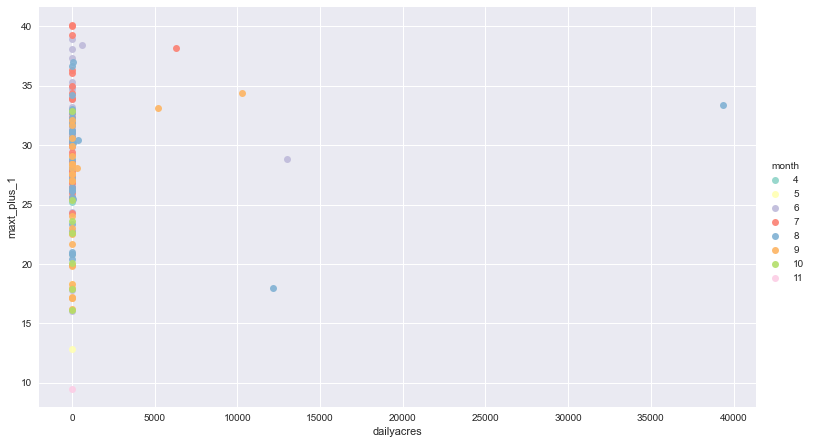

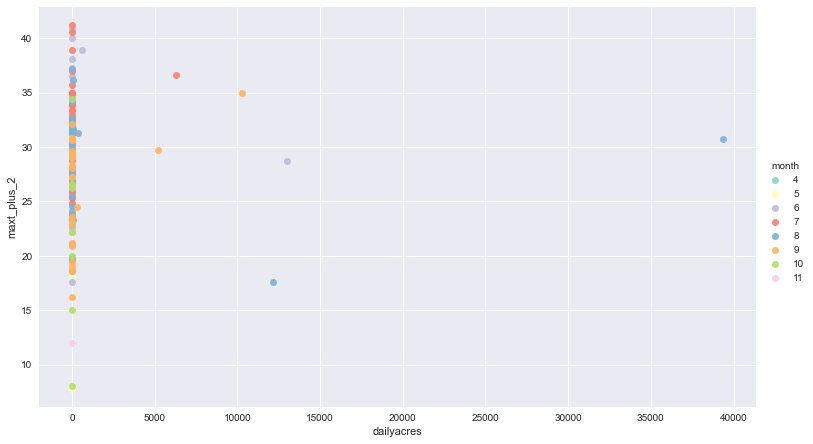

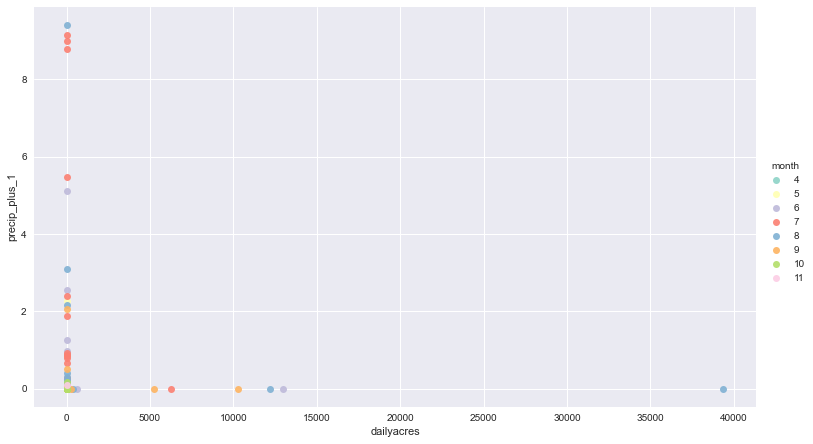

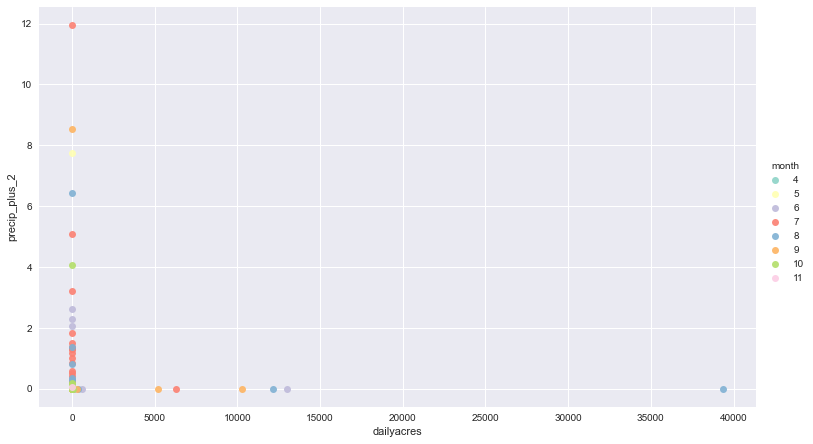

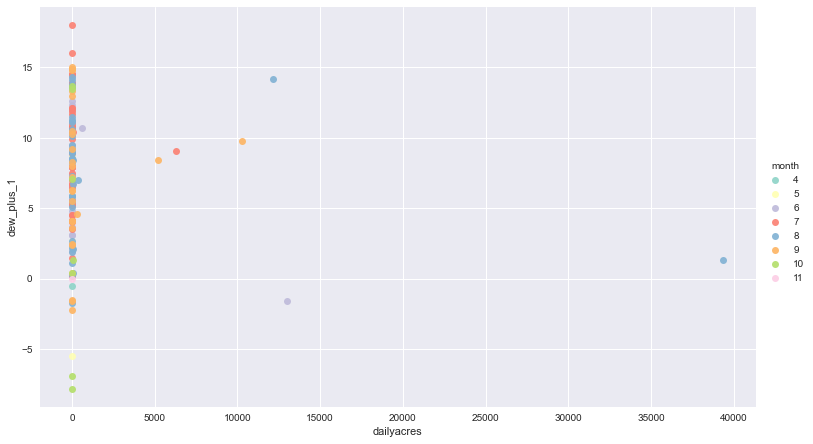

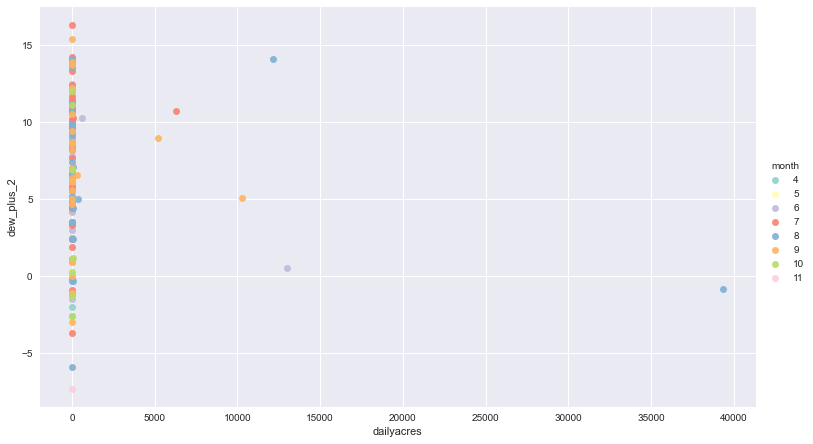

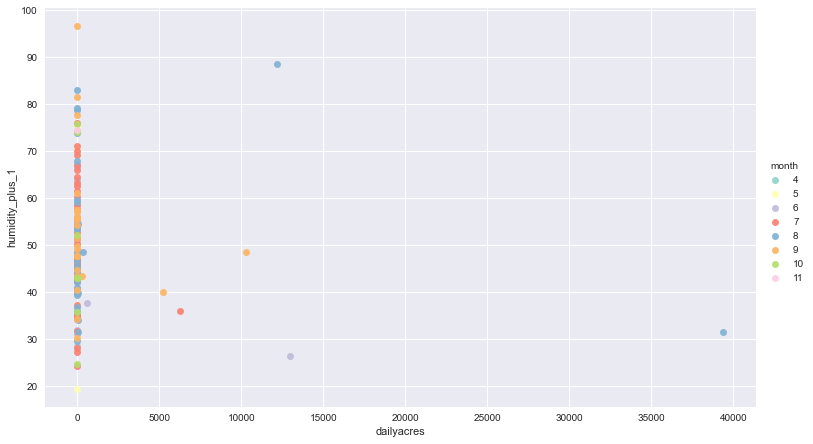

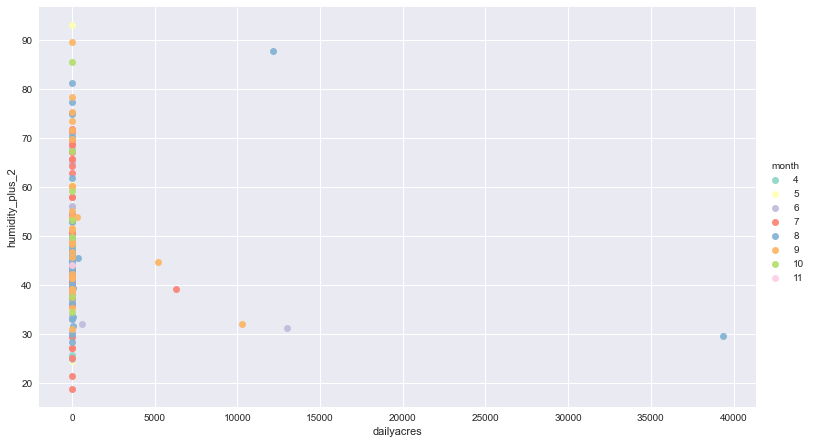

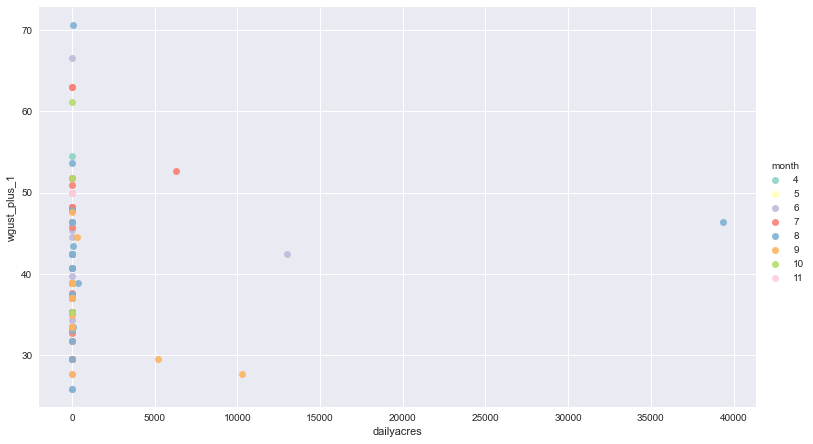

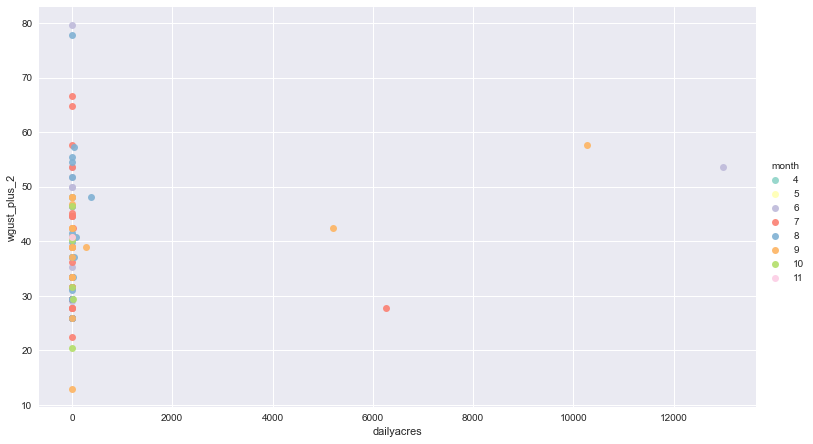

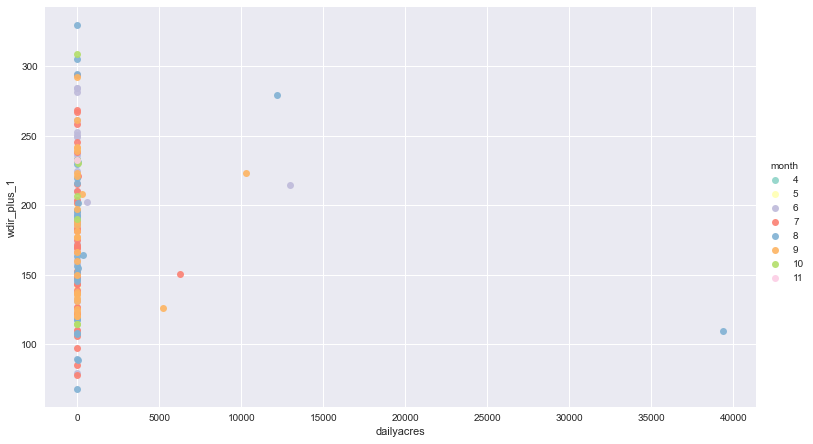

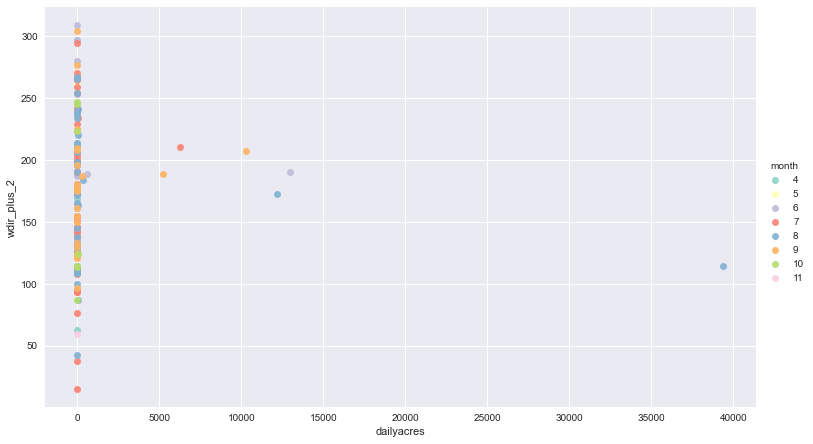

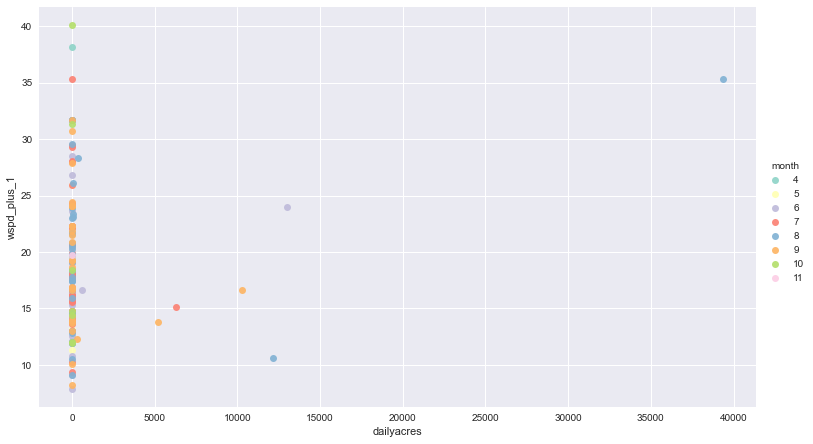

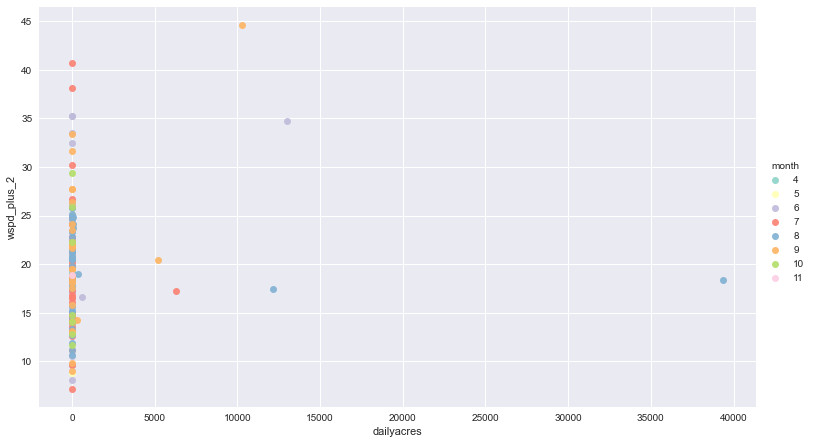

In [59]:
y = [    'temp', 'maxt', 'precip', 'dew', 'humidity', 'wgust', 'wdir', 'wspd',
       'sealevelpressure', 'tmp_plus_1', 'tmp_plus_2', 'maxt_plus_1',
       'maxt_plus_2', 'precip_plus_1', 'precip_plus_2', 'dew_plus_1',
       'dew_plus_2', 'humidity_plus_1', 'humidity_plus_2', 'wgust_plus_1',
       'wgust_plus_2', 'wdir_plus_1', 'wdir_plus_2', 'wspd_plus_1',
       'wspd_plus_2']

for i in y:
    ## wgust	month
    sns.lmplot(data=train,x="dailyacres", y=i , hue="month",
            scatter_kws={'alpha':0.9}, palette="Set3",height=6.27, aspect=10.7/6.27, fit_reg=False, x_jitter=0.1)
    plt.xlabel("dailyacres")
    plt.ylabel(i)
    plt.show()

## Correlation plots by month

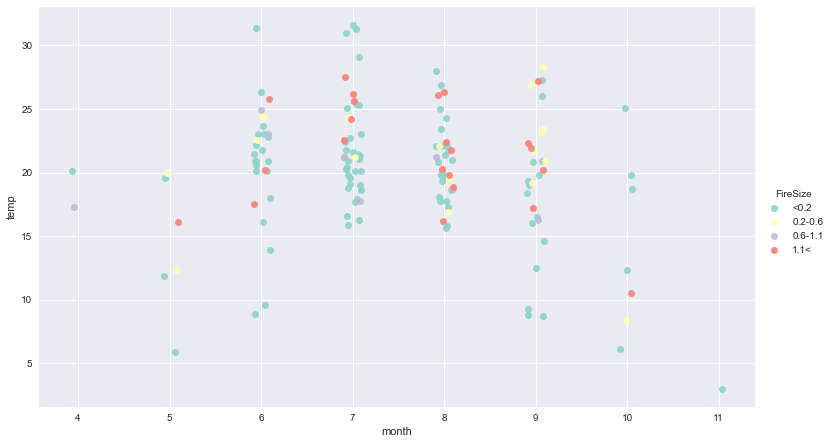

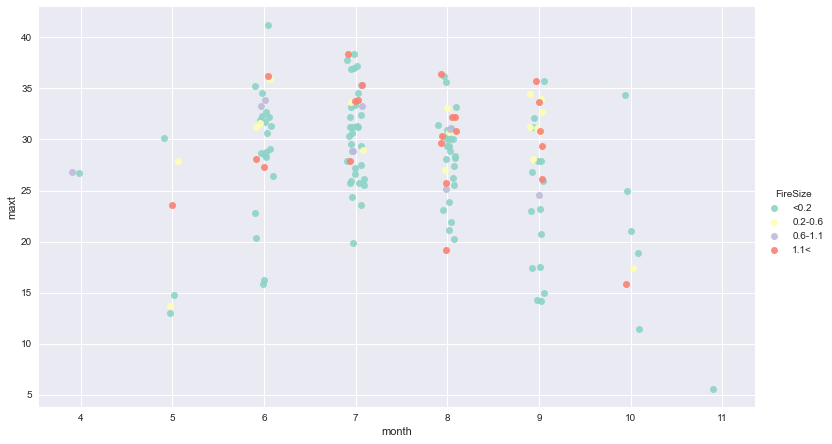

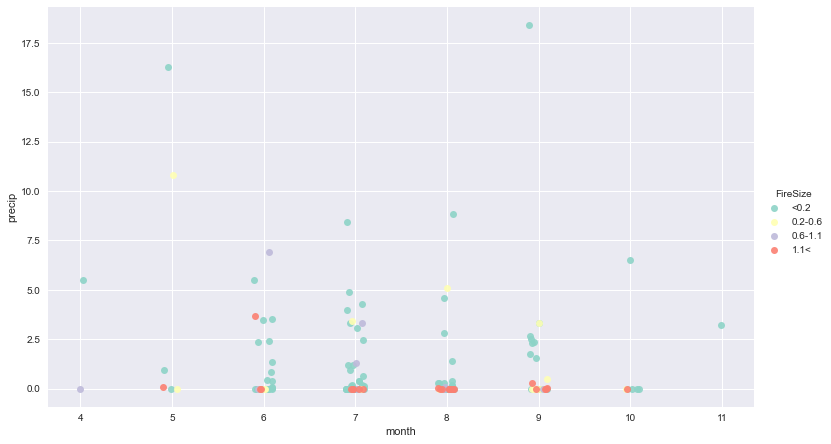

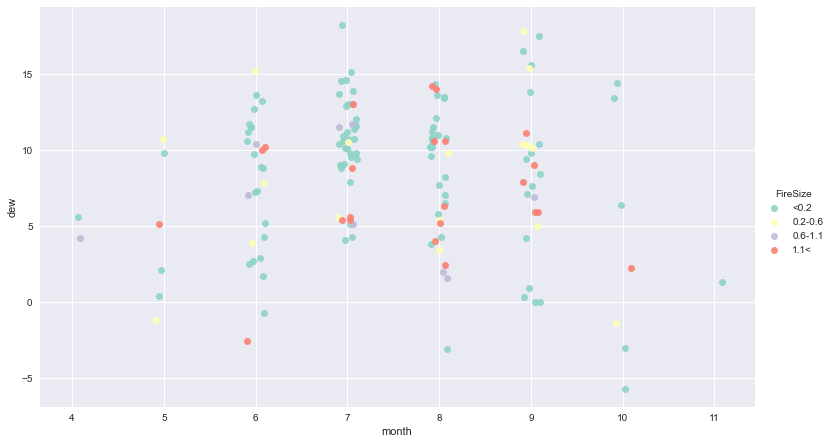

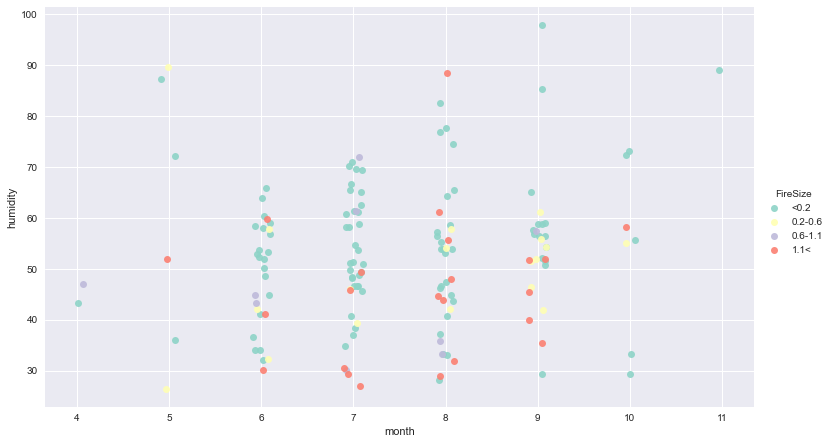

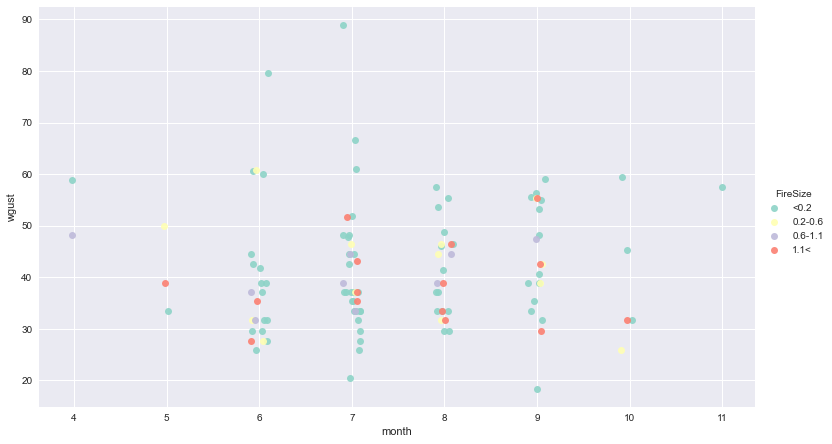

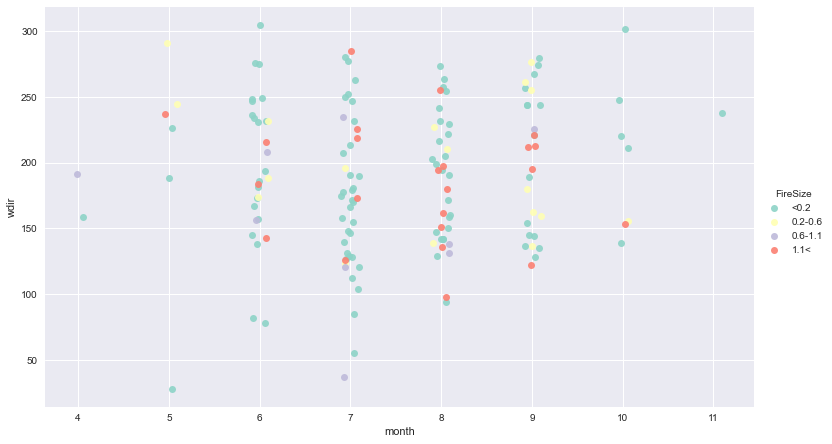

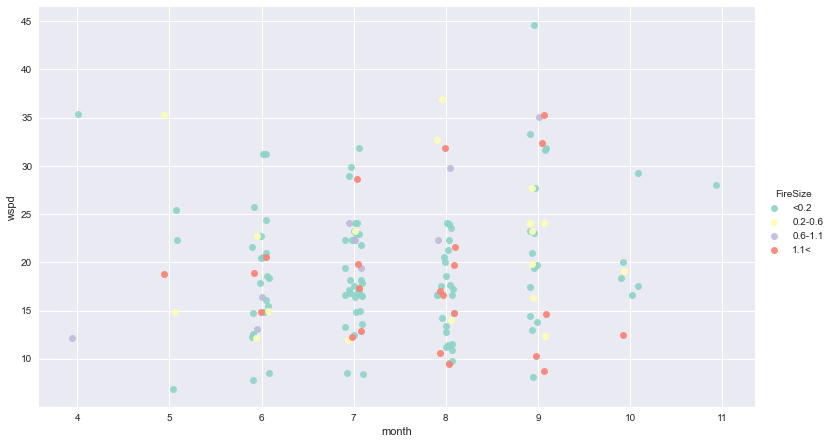

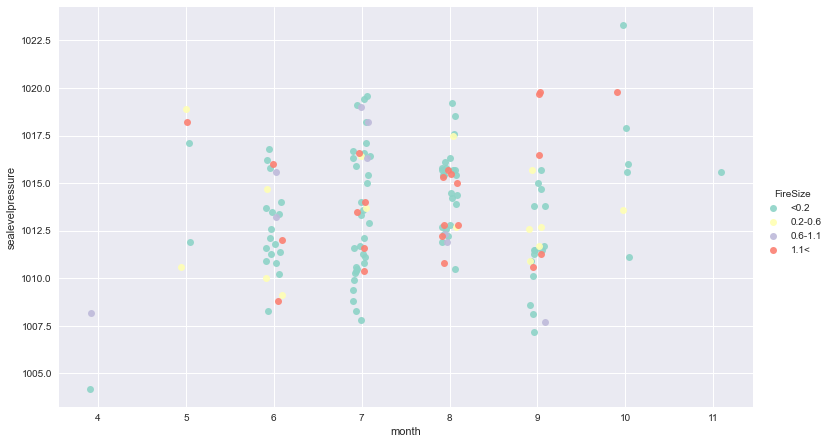

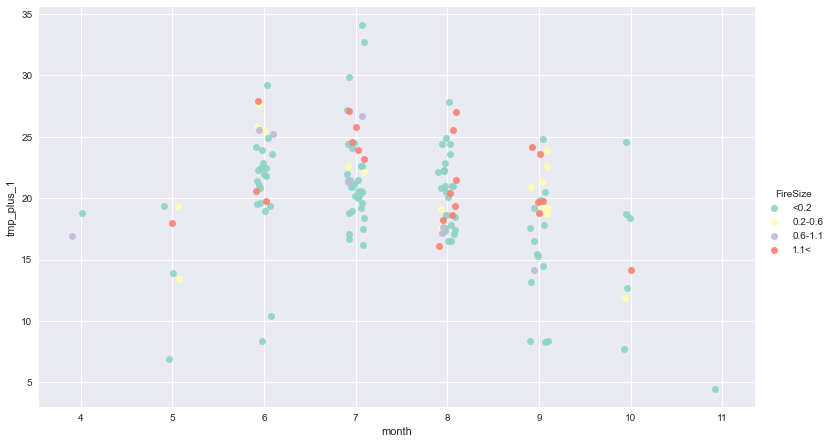

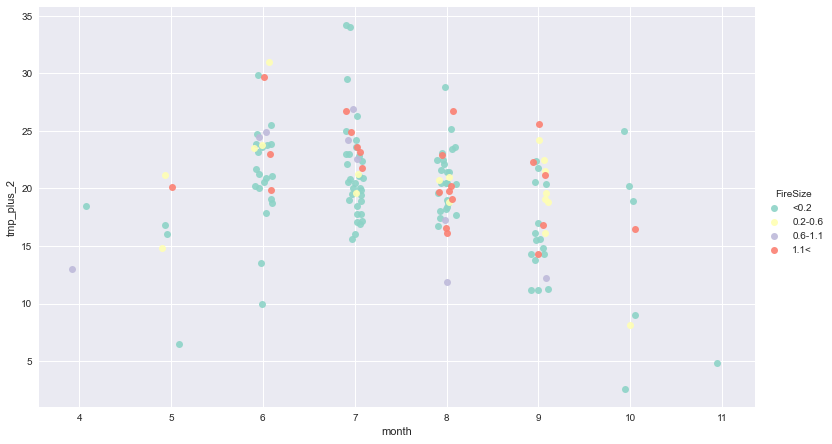

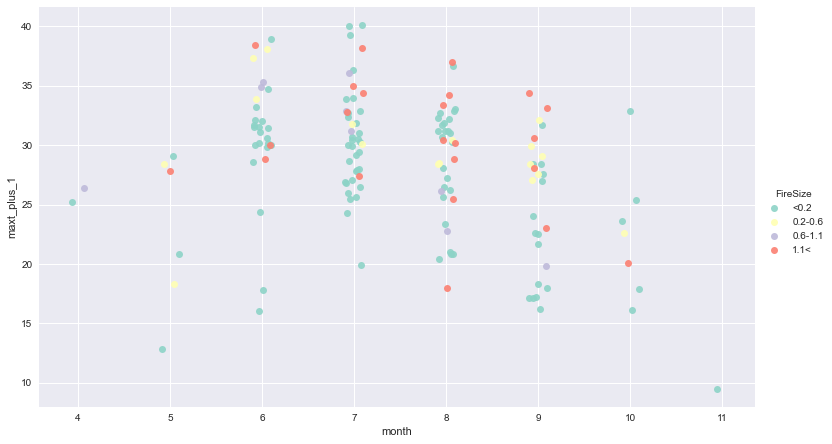

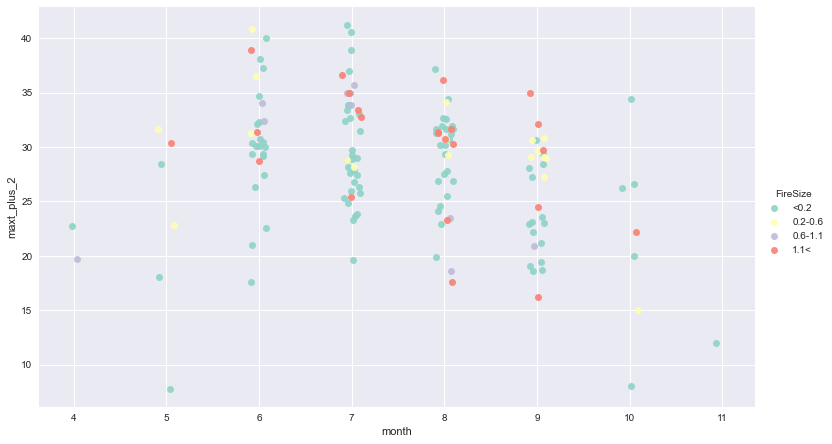

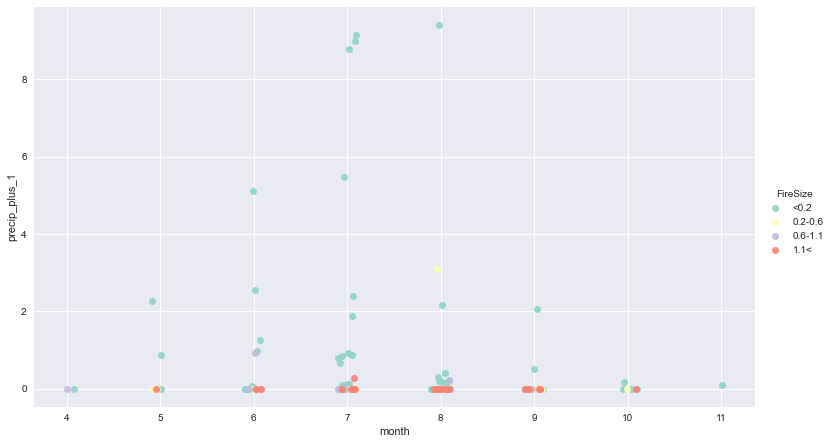

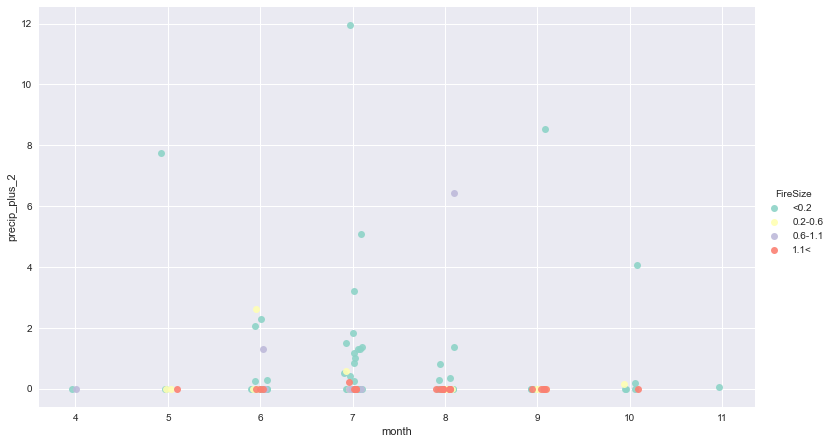

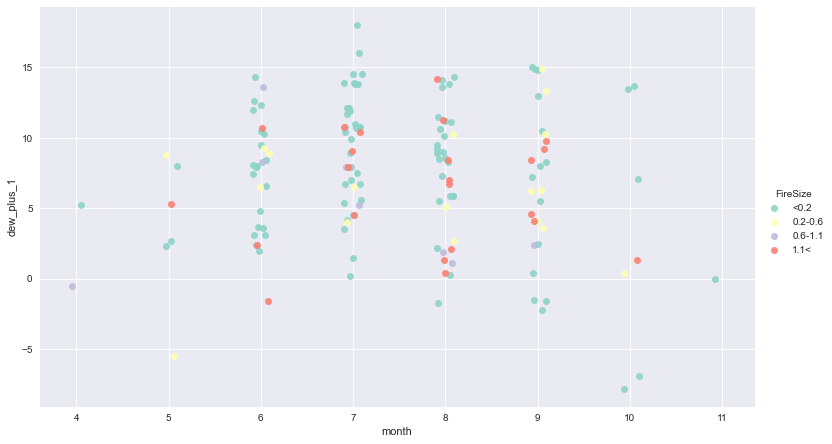

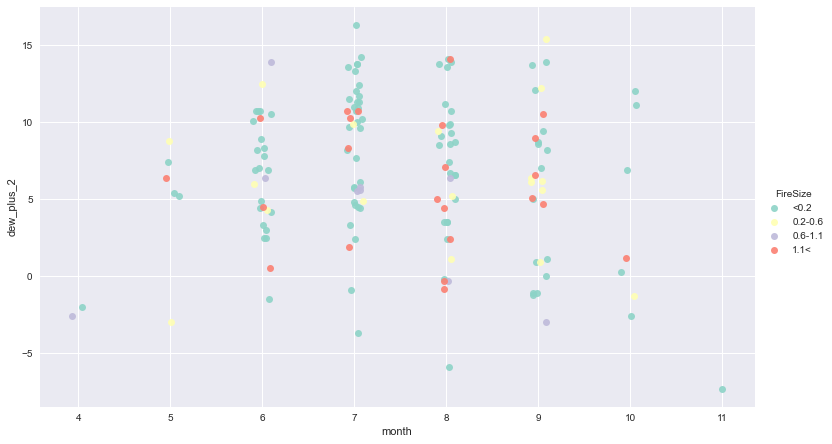

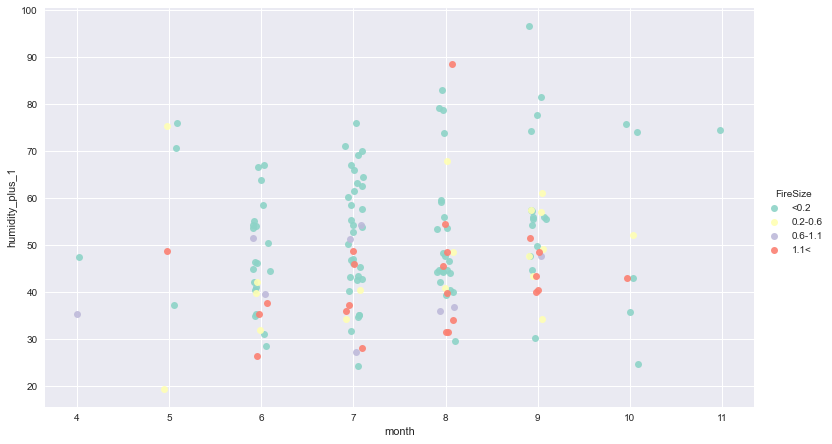

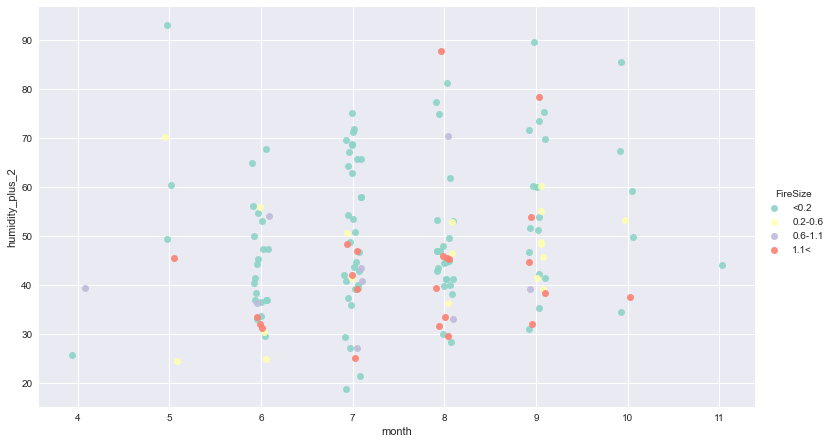

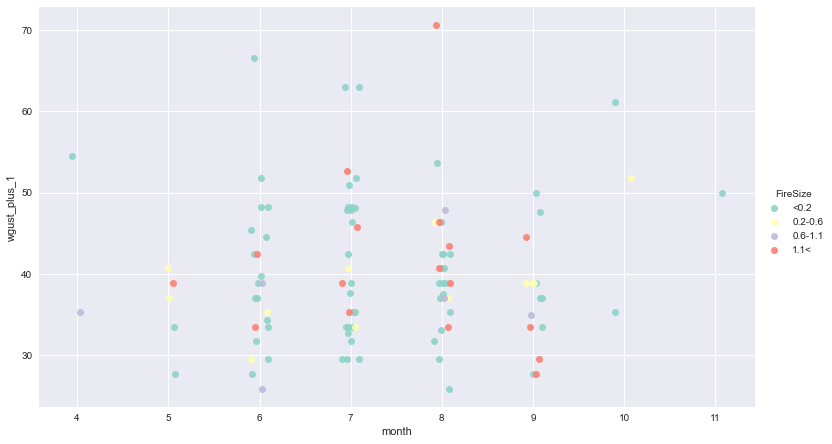

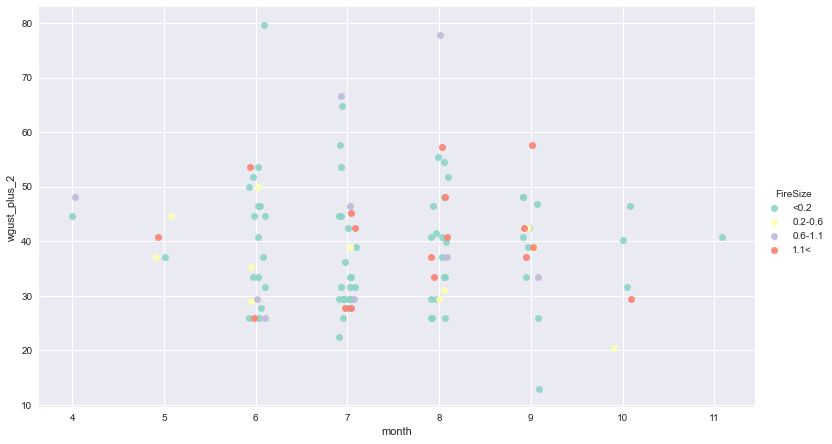

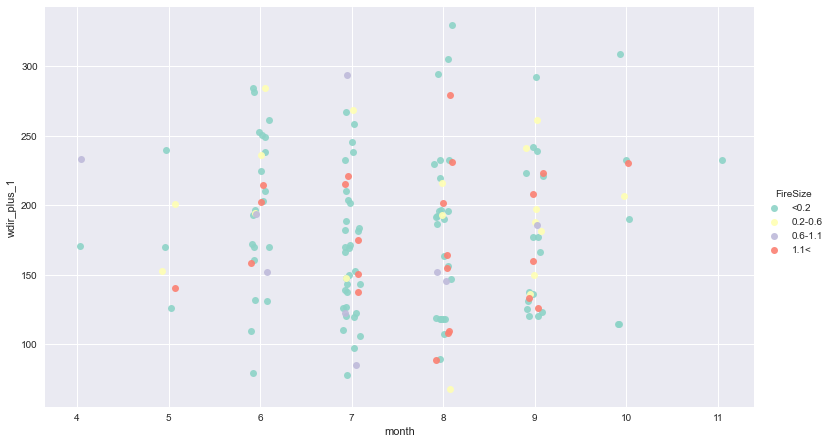

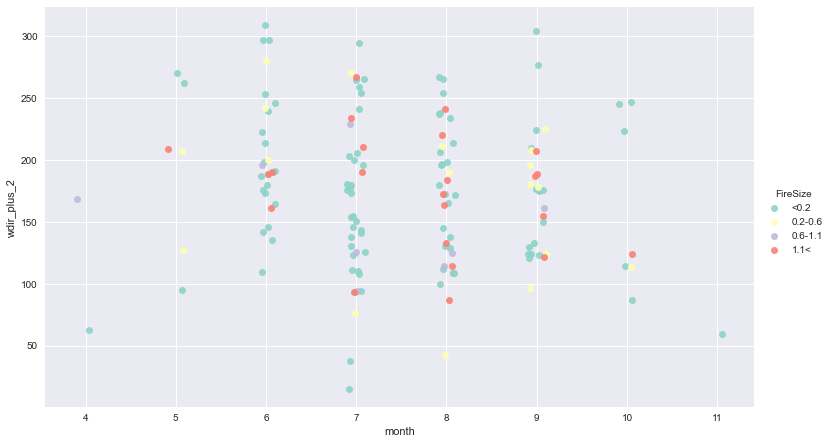

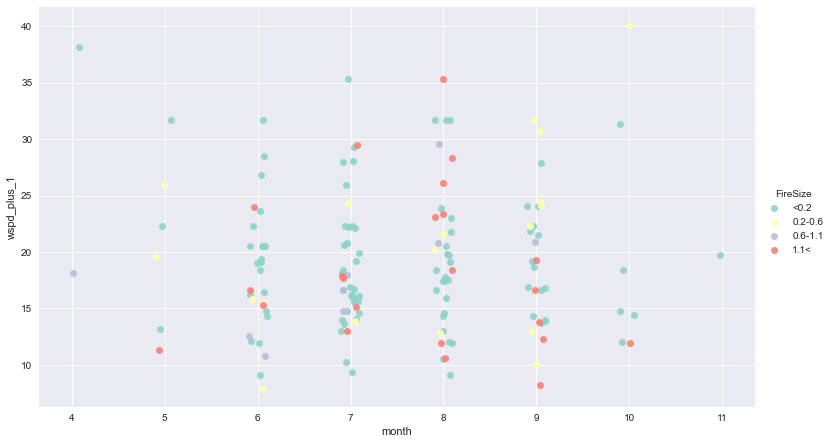

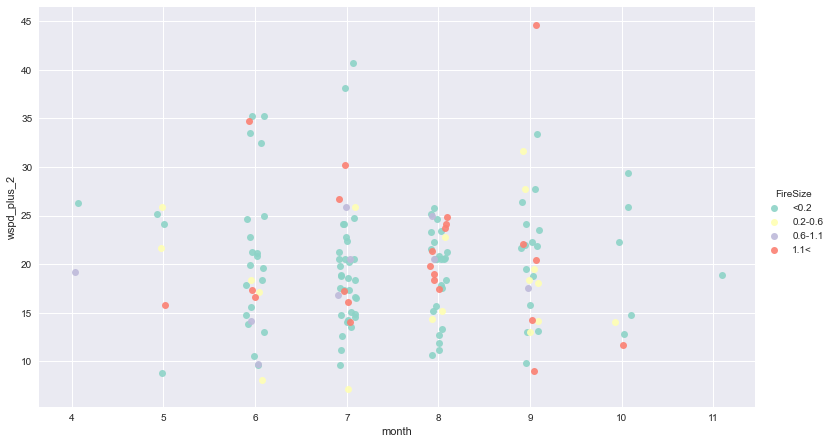

In [60]:
y = [    'temp', 'maxt', 'precip', 'dew', 'humidity', 'wgust', 'wdir', 'wspd',
       'sealevelpressure', 'tmp_plus_1', 'tmp_plus_2', 'maxt_plus_1',
       'maxt_plus_2', 'precip_plus_1', 'precip_plus_2', 'dew_plus_1',
       'dew_plus_2', 'humidity_plus_1', 'humidity_plus_2', 'wgust_plus_1',
       'wgust_plus_2', 'wdir_plus_1', 'wdir_plus_2', 'wspd_plus_1',
       'wspd_plus_2']

for i in y:
    ## wgust	month
    sns.lmplot(data=train,x="month", y=i , hue="FireSize",
            scatter_kws={'alpha':0.9}, palette="Set3",height=6.27, aspect=10.7/6.27, fit_reg=False, x_jitter=0.1)
    plt.xlabel("month")
    plt.ylabel(i)
    plt.show()

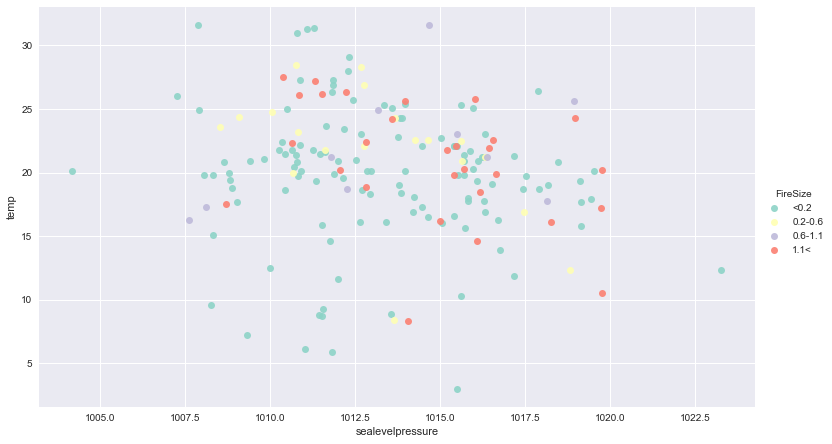

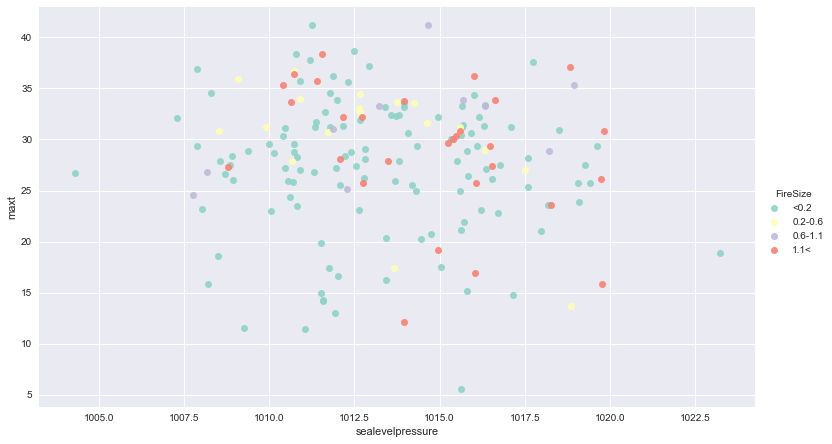

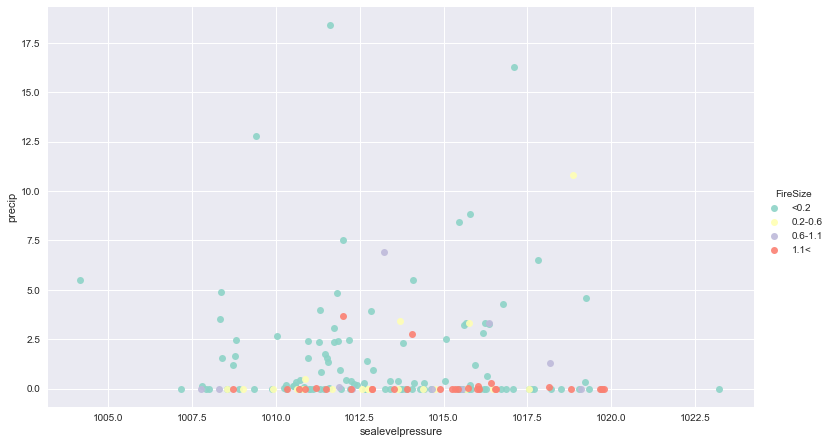

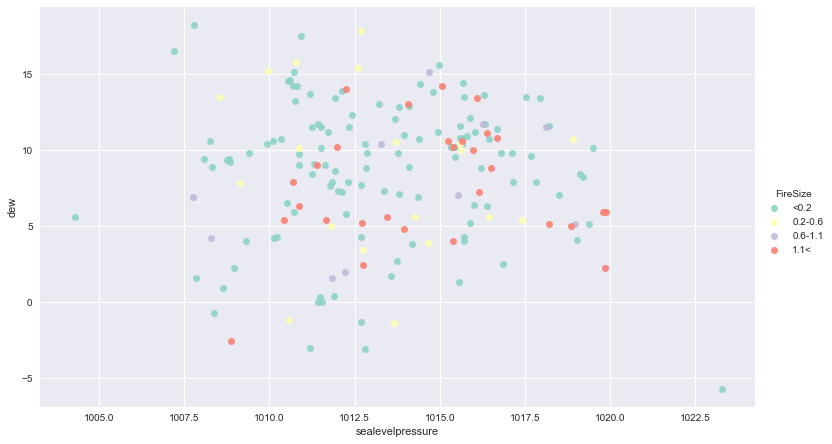

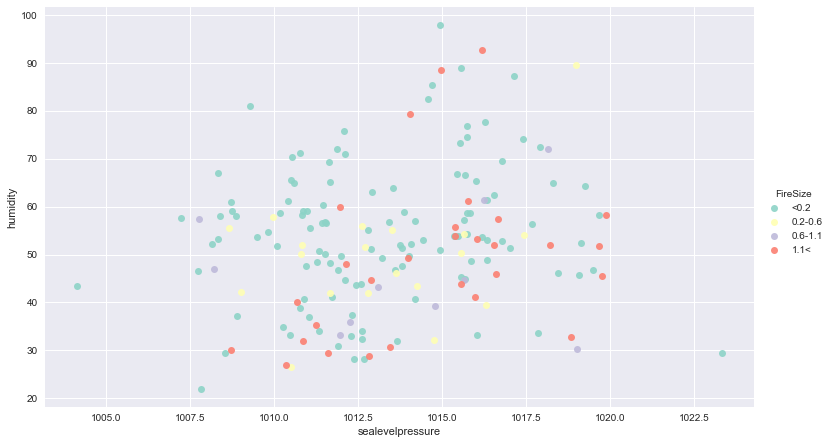

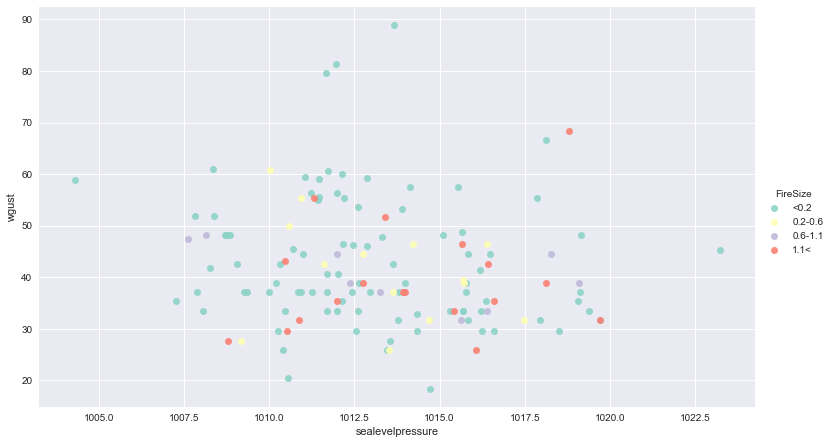

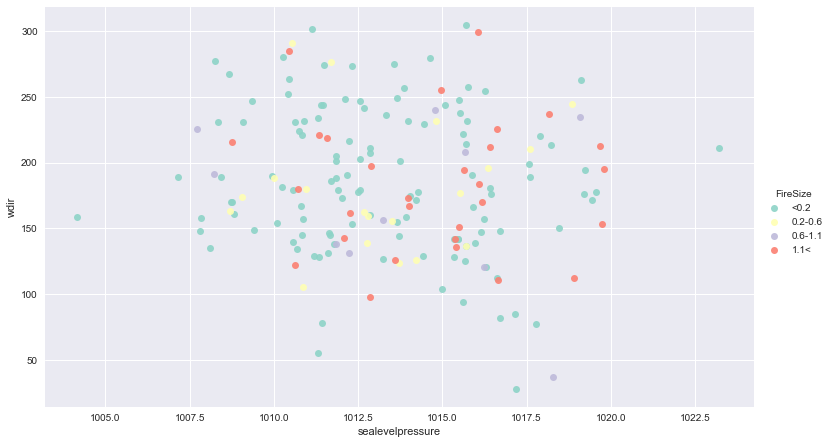

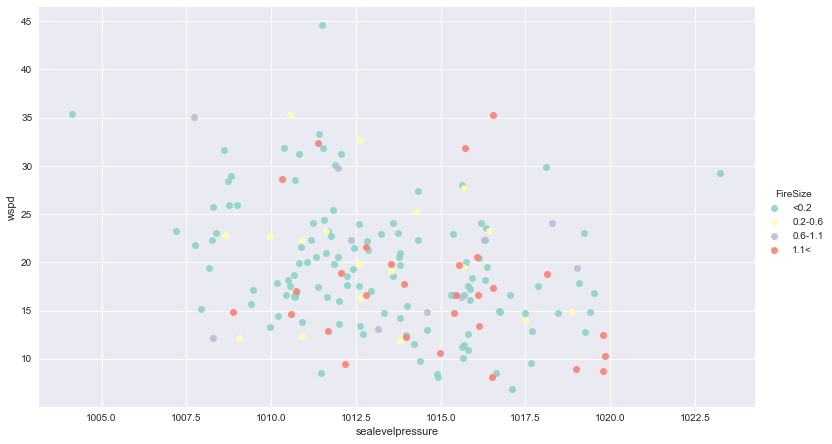

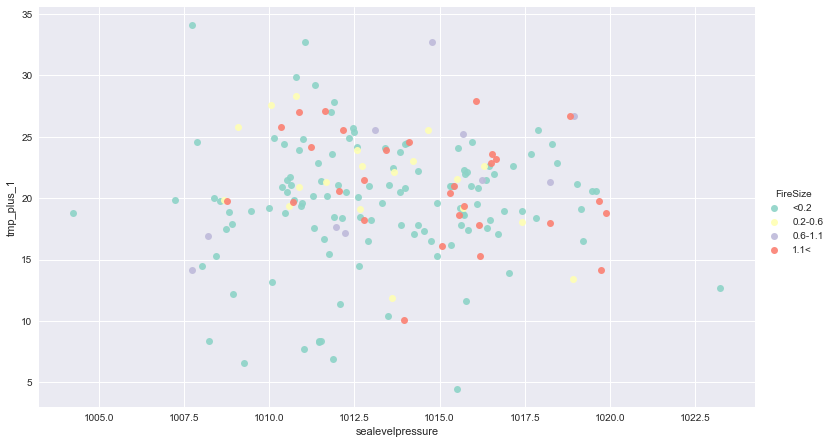

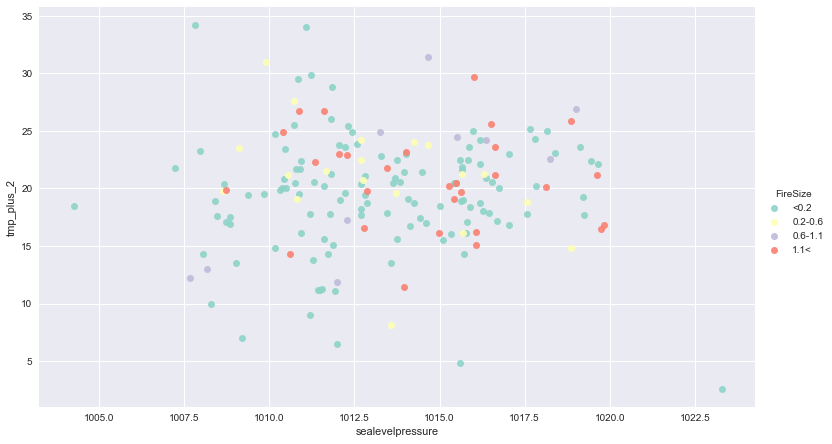

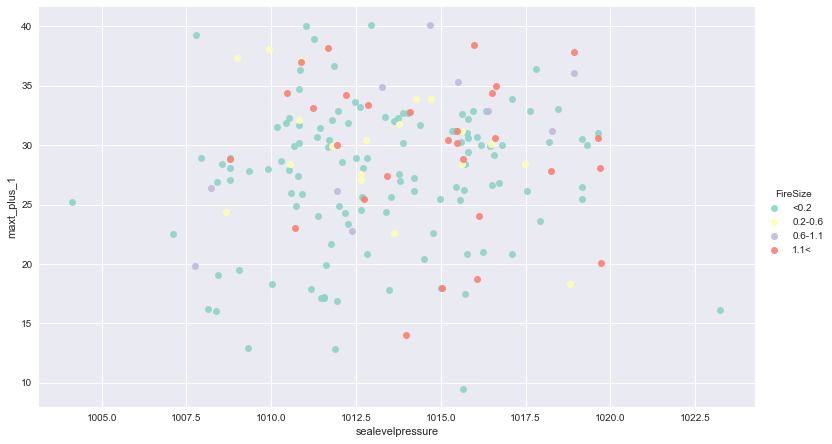

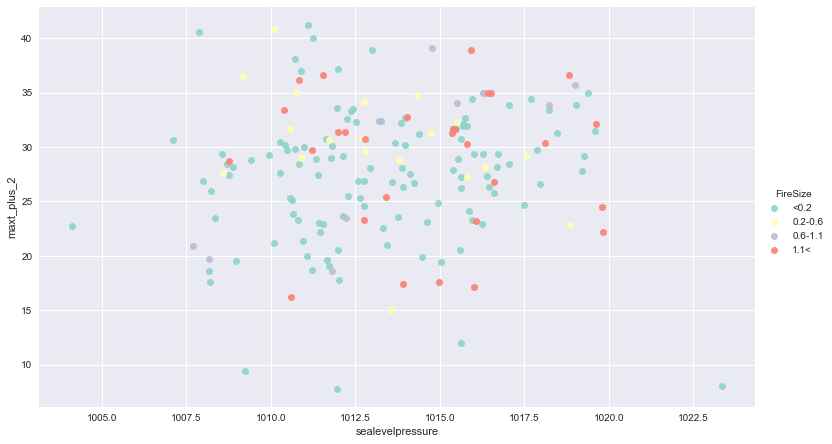

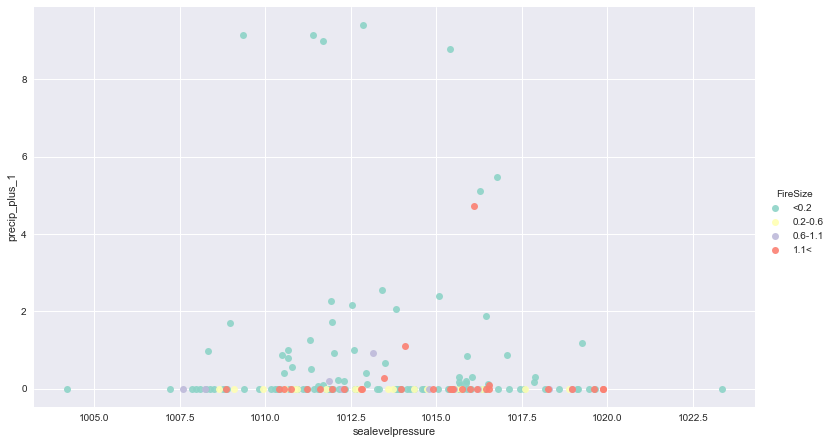

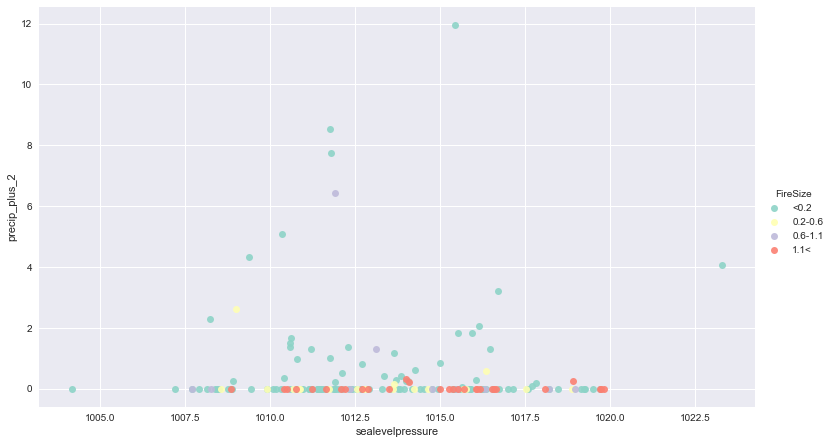

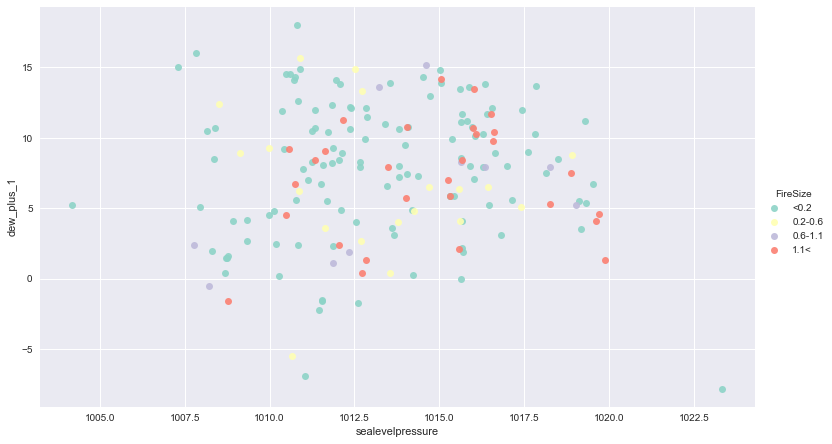

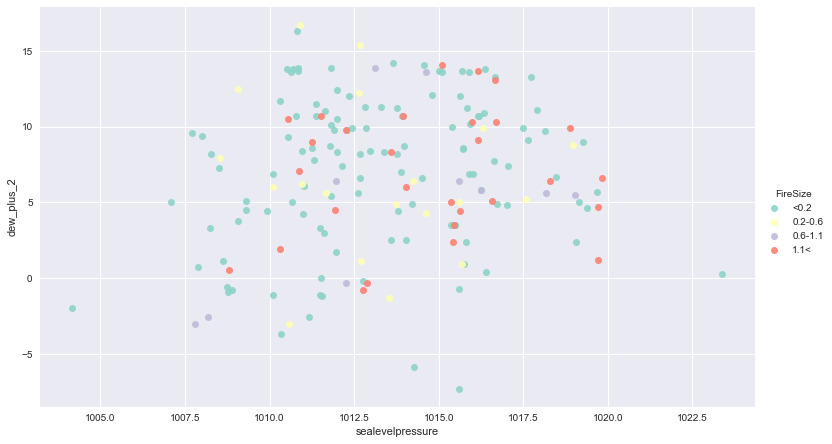

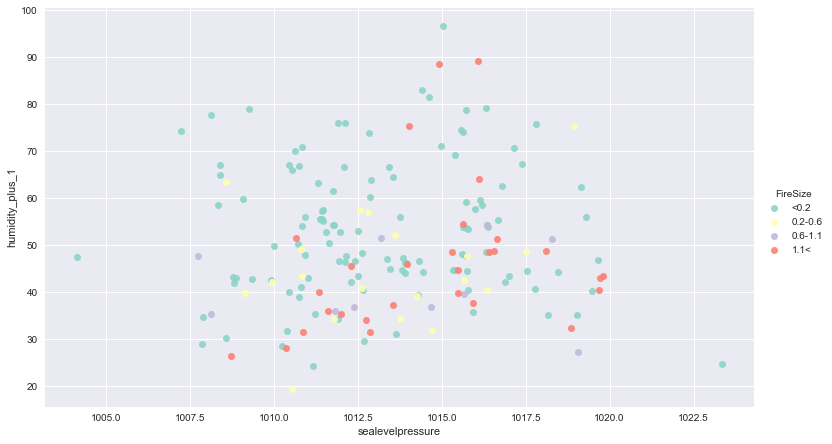

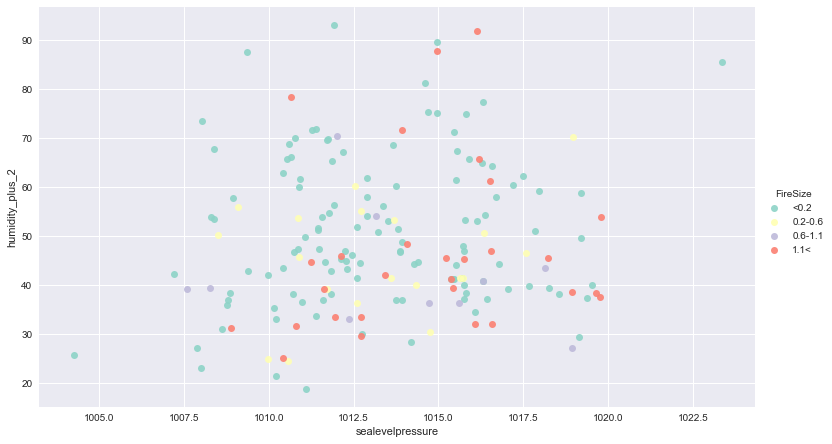

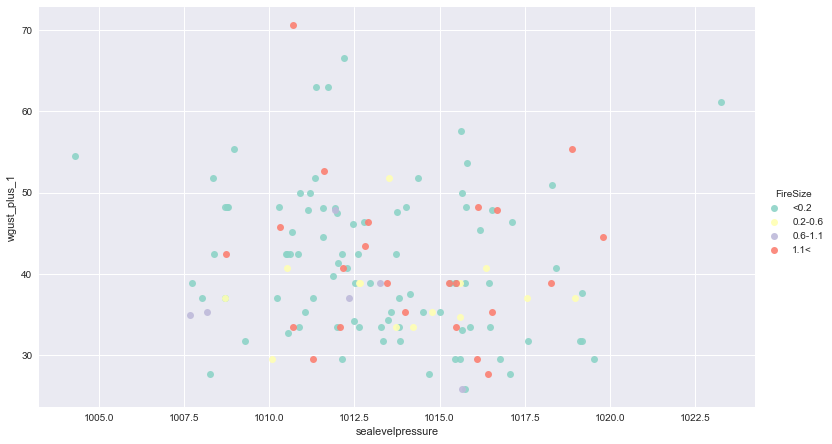

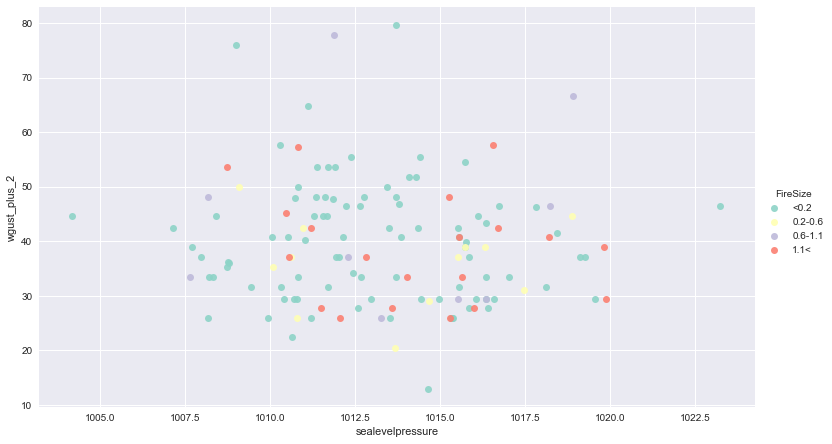

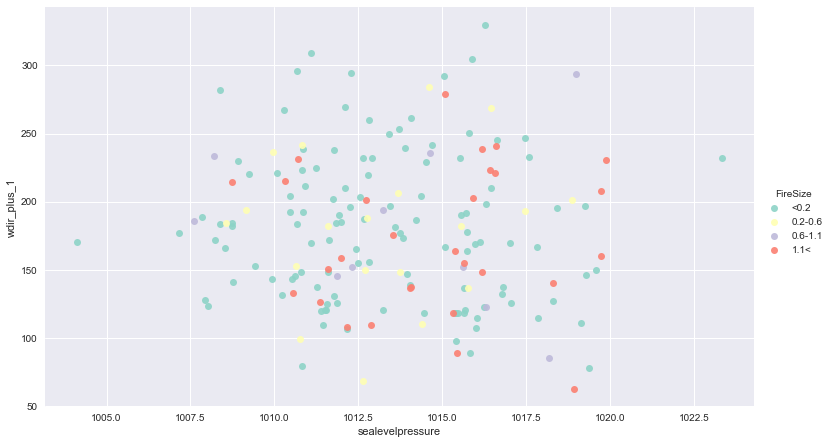

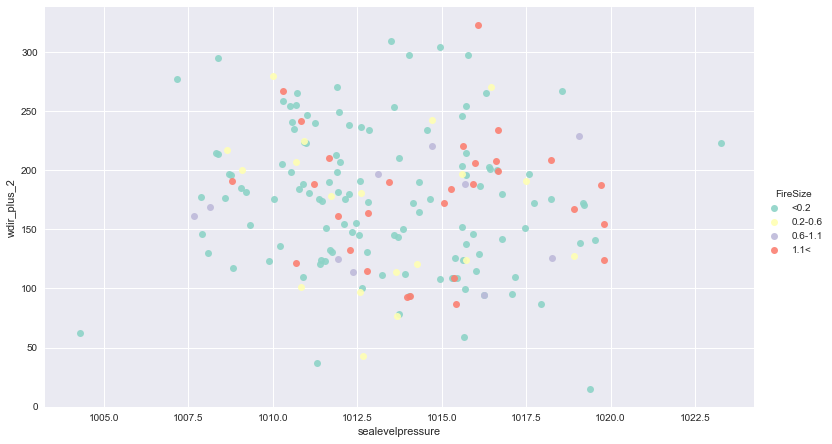

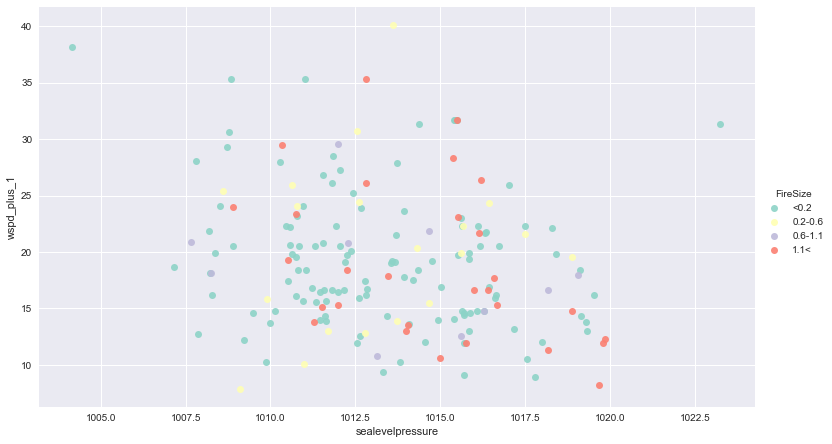

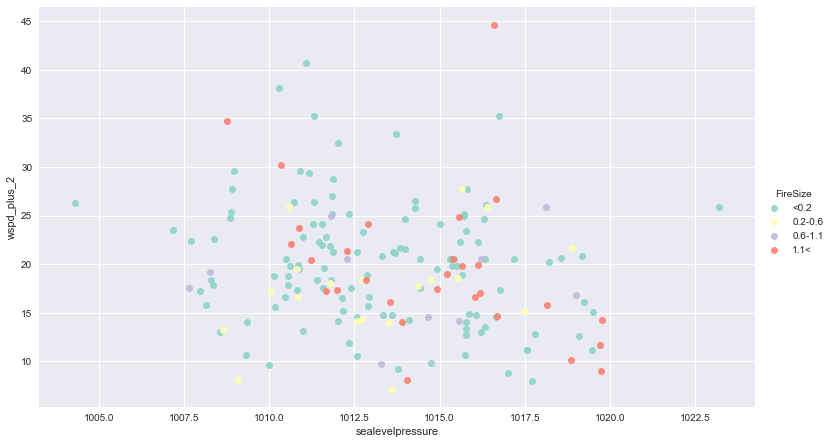

In [61]:
y = [    'temp', 'maxt', 'precip', 'dew', 'humidity', 'wgust', 'wdir', 'wspd',
       'tmp_plus_1', 'tmp_plus_2', 'maxt_plus_1',
       'maxt_plus_2', 'precip_plus_1', 'precip_plus_2', 'dew_plus_1',
       'dew_plus_2', 'humidity_plus_1', 'humidity_plus_2', 'wgust_plus_1',
       'wgust_plus_2', 'wdir_plus_1', 'wdir_plus_2', 'wspd_plus_1',
       'wspd_plus_2']

for i in y:
    ## wgust	month
    sns.lmplot(data=df,x="sealevelpressure", y=i , hue="FireSize",
            scatter_kws={'alpha':0.9}, palette="Set3",height=6.27, aspect=10.7/6.27, fit_reg=False, x_jitter=0.1)
    plt.xlabel("sealevelpressure")
    plt.ylabel(i)
    plt.show()

In [62]:
# import pandas_profiling as prof
# from pathlib import Path
# ## Initial phase report EDA
# profile = prof.ProfileReport(df, title="Profile Report wildfires ML", explorative=True)
# profile.to_file(Path("First_profile_report_wildfires.html"))

## Predict

** We dont have sufficient examples belonging to each class so that the machine learning model can identify and learn the underlying hidden patterns for accurate classification. 

In [113]:
## Encode target column
train['FireSize_enc'] = train["FireSize"].apply(lambda x: ['<0.2', '0.2-0.6', '0.6-1.1', '1.1<'].index(x))
val['FireSize_enc'] = val["FireSize"].apply(lambda x: ['<0.2', '0.2-0.6', '0.6-1.1', '1.1<'].index(x))


In [114]:
x = train[['latitude', 'longitude','temp', 'maxt', 'precip', 'dew', 'humidity', 'wgust', 'wdir', 'wspd',
       'tmp_plus_1', 'tmp_plus_2', 'maxt_plus_1',
       'maxt_plus_2', 'precip_plus_1', 'precip_plus_2', 'dew_plus_1',
       'dew_plus_2', 'humidity_plus_1', 'humidity_plus_2', 'wgust_plus_1',
       'wgust_plus_2', 'wdir_plus_1', 'wdir_plus_2', 'wspd_plus_1',
       'wspd_plus_2', 'sealevelpressure', 'month']].copy()
y = train['FireSize_enc'].copy()

x_val = val[['latitude', 'longitude','temp', 'maxt', 'precip', 'dew', 'humidity', 'wgust', 'wdir', 'wspd',
       'tmp_plus_1', 'tmp_plus_2', 'maxt_plus_1',
       'maxt_plus_2', 'precip_plus_1', 'precip_plus_2', 'dew_plus_1',
       'dew_plus_2', 'humidity_plus_1', 'humidity_plus_2', 'wgust_plus_1',
       'wgust_plus_2', 'wdir_plus_1', 'wdir_plus_2', 'wspd_plus_1',
       'wspd_plus_2', 'sealevelpressure', 'month']].copy()
y_val = val['FireSize_enc'].copy()

In [115]:
x.head()

,latitude,longitude,temp,maxt,precip,dew,humidity,wgust,wdir,wspd,tmp_plus_1,tmp_plus_2,maxt_plus_1,maxt_plus_2,precip_plus_1,precip_plus_2,dew_plus_1,dew_plus_2,humidity_plus_1,humidity_plus_2,wgust_plus_1,wgust_plus_2,wdir_plus_1,wdir_plus_2,wspd_plus_1,wspd_plus_2,sealevelpressure,month
327,38.040000,-119.195800,22.8,32.3,0.00,2.7,32.05,42.5,249.54,21.0,22.5,20.9,32.0,30.4,0.00,0.27,3.1,4.4,31.15,37.02,42.5,79.6,253.00,253.58,19.1,21.2,1013.7,6
912,41.726000,-120.320400,5.9,13.0,0.93,0.4,72.06,33.5,188.42,25.4,6.9,6.5,12.8,7.8,2.26,7.75,2.3,5.4,75.97,93.06,33.5,37.1,125.96,270.17,22.3,25.2,1011.9,5
592,38.708190,-119.193200,16.9,27.0,0.00,5.4,54.11,31.7,210.17,14.0,18.1,18.8,28.4,29.3,0.00,0.00,5.1,5.2,48.50,46.65,37.1,31.1,192.92,190.54,21.6,15.2,1017.5,8
267,41.459000,-121.722167,20.8,30.9,0.00,7.0,46.16,29.5,150.29,14.7,22.9,23.1,33.0,31.3,0.00,0.00,8.5,6.7,44.26,38.26,40.7,41.6,195.58,267.30,19.8,20.6,1018.5,8
817,37.811199,-119.872200,15.9,19.9,0.01,10.1,69.33,33.5,146.21,16.4,16.7,15.6,19.9,19.6,0.10,0.00,6.7,3.3,52.88,44.69,48.1,44.6,148.08,151.08,20.8,17.6,1011.6,7


In [116]:
## Save column names to fit after imputing
x_columns = x.columns
x_val_columns = x_val.columns

In [117]:
## Impute data (using median)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
x = imp.fit_transform(x)
x_val = imp.transform(x_val)
x = pd.DataFrame(x, columns=x_columns)
x_val = pd.DataFrame(x_val, columns=x_val_columns)

### Balancing data

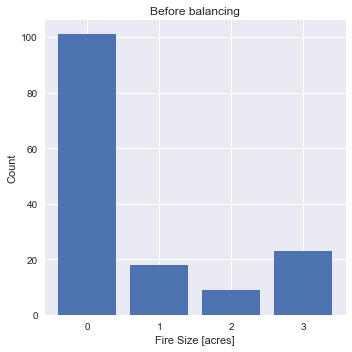

In [118]:
## Target column- before balancing
a1 = y.value_counts()

fig, (ax1) = plt.subplots(figsize = (5,5))
ax1.bar(a1.index, a1.values)
ax1.set_xticks([0,1,2,3])
ax1.set_xlabel("Fire Size [acres]")
ax1.set_ylabel("Count")
ax1.set_title("Before balancing")
plt.tight_layout()
plt.show()

In [119]:
a1

0    101
3     23
1     18
2      9
Name: FireSize_enc, dtype: int64

In [120]:
# SMOTH 
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
## Over and under balancing using SMOTH
strategy_over = {0:109, 1:30, 2:30, 3:30}
strategy_under = {0:100, 1:30, 2:30, 3:30}

over = SMOTE(sampling_strategy=strategy_over, k_neighbors=2)
under = RandomUnderSampler(sampling_strategy=strategy_under)
x,y = over.fit_resample(x,y)
x,y = under.fit_resample(x,y)

c:\Users\eitam\VScodeProjects\datalake\venv\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning:

After over-sampling, the number of samples (109) in class 0 will be larger than the number of samples in the majority class (class #0 -> 101)



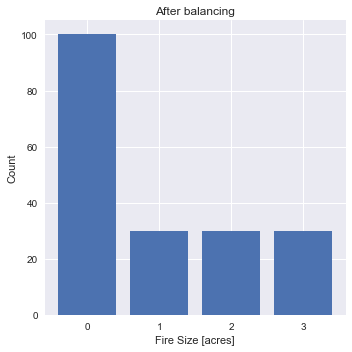

In [121]:
## Target column- before balancing
a1 = y.value_counts()

fig, (ax1) = plt.subplots(figsize = (5,5))
ax1.bar(a1.index, a1.values)
ax1.set_xticks([0,1,2,3])
ax1.set_xlabel("Fire Size [acres]")
ax1.set_ylabel("Count")
ax1.set_title("After balancing")
plt.tight_layout()
plt.show()

In [122]:
import lightgbm as lgbm
## manual lgbm setting
opt_parameters_manual = {'learning_rate' : 0.08,
              'n_estimators' : 1000,
              'num_leaves': 14, 
              'min_child_samples': 211, 
              'min_child_weight': 0.1,
              'subsample': 0.6196091116562037, 
              'max_depth': 6,
              'colsample_bytree': 0.5351996786275169,
              'reg_alpha': 10,
              'reg_lambda': 1}
lgbm_clf_man = lgbm.LGBMClassifier(**opt_parameters_manual)

In [123]:
## Data processing, metrics and modeling
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

import plotly.tools as tls
import plotly.offline as py
import plotly.graph_objs as go

def model_predict(model, subtitle): 

    model.fit(x, y)
    pred_proba = model.predict_proba(x_val)

    y_pred = model.predict(x_val)
    conf_matrix = confusion_matrix(y_val, y_pred)
    return pred_proba, conf_matrix

y_pr, conf_m = model_predict(lgbm_clf_man, "Lightgbm")
y_df = pd.DataFrame(y_pr, columns = ['Column_0','Column_1','Column_2', 'column_3'])
#pd.DataFrame(list(y_pr))

In [124]:
y_df["real"] = y_val.values
y_df

,Column_0,Column_1,Column_2,column_3,real
0,0.526316,0.157895,0.157895,0.157895,1
1,0.526316,0.157895,0.157895,0.157895,0
2,0.526316,0.157895,0.157895,0.157895,3
3,0.526316,0.157895,0.157895,0.157895,0
4,0.526316,0.157895,0.157895,0.157895,0
5,0.526316,0.157895,0.157895,0.157895,0
6,0.526316,0.157895,0.157895,0.157895,1
7,0.526316,0.157895,0.157895,0.157895,3
8,0.526316,0.157895,0.157895,0.157895,0
9,0.526316,0.157895,0.157895,0.157895,0
